In [24]:
import numpy as np
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader
import datetime
import pandas_datareader.data as web
from scipy.stats import norm
import yfinance as yf
import cufflinks as cf
cf.go_offline()

In [26]:
tickers = ["VIMTALABS.NS","BEL.NS","RITES.NS","MANINFRA.NS","KEI.NS","DEEPAKNTR.NS","PITTIENG.NS","VINATIORGA.NS",
          "IONEXCHANG.NS","MARKSANS.NS","HAPPSTMNDS.NS","PERSISTENT.NS","EXPLEOSOL.NS","TNPL.NS",
          "JKPAPER.NS","MMFL.NS","TRITURBINE.NS","KKCL.NS","AVANTEL.BO","SKFINDIA.NS","VOLTAMP.NS","TIMKEN.BO",
           "FIEMIND.NS","GUJGASLTD.NS","ADFFOODS.NS","PAGEIND.NS","ESABINDIA.NS","SUMICHEM.NS",
           "LAURUSLABS.NS","CIPLA.NS","BSOFT.NS"]

In [27]:
data = pd.DataFrame()

data = yf.download(tickers,period="4y")
     
data = data['Adj Close']
        
data.to_csv("//Users//sjacob//stocks//QALINVESTJAN24.csv")
data.dropna()

[*********************100%***********************]  31 of 31 completed


ADFFOODS.NS  AVANTEL.BO      BEL.NS    BSOFT.NS     CIPLA.NS  \
Date                                                                       
2022-02-22   135.558533   11.277138   63.832478  406.776703   901.671204   
2022-02-23   138.556000   11.362663   64.366173  404.921936   903.151978   
2022-02-24   130.123856   10.853583   60.759724  373.098267   884.297180   
2022-02-25   135.838669   11.062102   64.738136  393.939789   911.789612   
2022-02-28   137.258026   11.426195   68.069656  397.942169   913.171570   
...                 ...         ...         ...         ...          ...   
2024-01-09   200.899994  113.199997  184.649994  719.750000  1289.349976   
2024-01-10   200.550003  114.500000  185.600006  739.549988  1329.199951   
2024-01-11   200.149994  113.949997  184.350006  747.000000  1325.650024   
2024-01-12   200.449997  119.199997  183.500000  786.700012  1308.000000   
2024-01-15   199.800003  121.699997  188.649994  786.250000  1313.150024   

            DEEPAKNTR.NS  ESABINDIA.NS  EXPLEOSOL.NS   FIEMIND.NS  \
Date                                                                
2022-02-22   1963.553711   2617.630371   1412.702393   938.302063   
2022-02-23   1999.131958   2676.519775   1451.724121   964.829834   
2022-02-24   1841.287476   2643.219482   1350.357666   914.892456   
2022-02-25   1981.417358   2673.483887   1390.674927   957.538269   
2022-02-28   1983.898315   2717.963623   1375.225708   968.715393   
...                  ...           ...           ...          ...   
2024-01-09   2439.449951   5692.950195   1399.449951  2298.899902   
2024-01-10   2429.500000   5682.750000   1387.949951  2300.100098   
2024-01-11   2470.600098   5743.299805   1382.449951  2367.100098   
2024-01-12   2433.500000   5699.649902   1404.599976  2487.600098   
2024-01-15   2428.100098   5687.549805   1418.849976  2501.949951   

            GUJGASLTD.NS  ...  PITTIENG.NS    RITES.NS  SKFINDIA.NS  \
Date                      ...                                         
2022-02-22    631.703857  ...   219.728439  223.731461  3371.162109   
2022-02-23    609.469055  ...   229.032242  226.717545  3319.598145   
2022-02-24    562.250732  ...   215.769348  218.071320  3208.024658   
2022-02-25    589.786621  ...   230.022003  219.319214  3309.226318   
2022-02-28    572.852844  ...   231.160233  215.397247  3541.560059   
...                  ...  ...          ...         ...          ...   
2024-01-09    514.049988  ...   691.500000  512.650024  4598.649902   
2024-01-10    515.200012  ...   696.599976  524.599976  4594.750000   
2024-01-11    541.099976  ...   701.599976  528.150024  4553.250000   
2024-01-12    534.599976  ...   701.349976  520.500000  4592.000000   
2024-01-15    541.599976  ...   699.650024  534.700012  4552.149902   

            SUMICHEM.NS    TIMKEN.BO     TNPL.NS  TRITURBINE.NS  VIMTALABS.NS  \
Date                                                                            
2022-02-22   360.374207  1967.290527  113.141525     178.058350    329.475983   
2022-02-23   366.144958  1983.475830  123.494949     179.004929    333.629669   
2022-02-24   356.792328  1937.218262  113.841072     160.023346    313.454651   
2022-02-25   367.239410  2057.457764  117.292221     179.951538    319.932404   
2022-02-28   374.751343  2024.238159  119.297607     175.368042    314.987549   
...                 ...          ...         ...            ...           ...   
2024-01-09   417.450012  3167.350098  295.649994     401.549988    440.049988   
2024-01-10   408.200012  3238.399902  295.950012     392.649994    441.899994   
2024-01-11   407.600006  3361.750000  293.000000     398.000000    459.950012   
2024-01-12   408.250000  3353.949951  291.299988     403.399994    449.600006   
2024-01-15   403.450012  3361.899902  313.250000     417.399994    436.250000   

            VINATIORGA.NS   VOLTAMP.NS  
Date                                    
2022-02-22    1807.868408  1883.227783  
2022-02-23    1785.91455

In [28]:
returns = np.log(data / data.shift(1))
vols = returns.std() * 252 ** 0.5 *100
vols

ADFFOODS.NS      45.214042
AVANTEL.BO       54.758495
BEL.NS           38.322388
BSOFT.NS         47.029070
CIPLA.NS         28.065471
DEEPAKNTR.NS     42.233811
ESABINDIA.NS     41.699964
EXPLEOSOL.NS     49.997473
FIEMIND.NS       50.875885
GUJGASLTD.NS     34.576949
HAPPSTMNDS.NS    37.399443
IONEXCHANG.NS    44.065696
JKPAPER.NS       45.367958
KEI.NS           42.867388
KKCL.NS          39.376944
LAURUSLABS.NS    40.081472
MANINFRA.NS      50.011803
MARKSANS.NS      50.923813
MMFL.NS          44.358224
PAGEIND.NS       29.800735
PERSISTENT.NS    36.757130
PITTIENG.NS      54.153139
RITES.NS         35.466351
SKFINDIA.NS      32.108197
SUMICHEM.NS      36.568535
TIMKEN.BO        38.793805
TNPL.NS          41.163096
TRITURBINE.NS    49.196272
VIMTALABS.NS     53.315448
VINATIORGA.NS    34.230509
VOLTAMP.NS       43.032977
dtype: float64

In [29]:
annual_returns = returns.mean() * 252 * 100
annual_returns

ADFFOODS.NS      32.875874
AVANTEL.BO       82.924046
BEL.NS           45.468091
BSOFT.NS         61.819331
CIPLA.NS         25.888909
DEEPAKNTR.NS     46.896886
ESABINDIA.NS     40.533839
EXPLEOSOL.NS     39.960271
FIEMIND.NS       43.822933
GUJGASLTD.NS     18.582329
HAPPSTMNDS.NS    29.077901
IONEXCHANG.NS    61.113598
JKPAPER.NS       30.525574
KEI.NS           44.619686
KKCL.NS          36.425260
LAURUSLABS.NS    42.325699
MANINFRA.NS      62.622928
MARKSANS.NS      54.254063
MMFL.NS          22.908157
PAGEIND.NS       12.098767
PERSISTENT.NS    61.622557
PITTIENG.NS      69.852978
RITES.NS         19.243939
SKFINDIA.NS      21.365896
SUMICHEM.NS      18.110503
TIMKEN.BO        34.206386
TNPL.NS          19.128055
TRITURBINE.NS    37.367631
VIMTALABS.NS     36.536433
VINATIORGA.NS    14.683486
VOLTAMP.NS       42.487751
dtype: float64

In [30]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import pandas_datareader.data as web
import datetime
import math

class ValueAtRiskMonteCarlo:
    
    def __init__(self, S, mu, sigma, c, n, iterations):
        self.S = S
        self.mu = mu
        self.sigma = sigma
        self.c = c
        self.n = n
        self.iterations = iterations 

    def simulation(self):
        stock_data = np.zeros([self.iterations, 1])	
        rand = np.random.normal(0, 1, [1, self.iterations])

        #equation for the S(t) stock price
        stock_price = self.S*np.exp(self.n*(self.mu - 0.5*self.sigma**2)+self.sigma*np.sqrt(self.n)*rand)
        #we have to sort the stock prices to determine the percentile
        stock_price = np.sort(stock_price)

        #it depends on the confidence level: 95% -> 5 and 99% -> 1
        percentile = np.percentile(stock_price,(1-self.c)*100)

        return self.S-percentile

In [31]:

df = pd.DataFrame(columns = ['Ticker', 'Cov_mar','Market_var','Beta','Volatility%','Return%','CV','Sharp Ratio','CAGR','MAXDD%','Value at Risk']) 
data = pd.DataFrame()
data['^BSESN'] = yf.download('^BSESN',period="3y").Close

for t in tickers:
    try:
        data[t] = yf.download(t,period="3y").Close 
    except:
        continue
    sec_returns = np.log( data / data.shift(1) )
    cov = sec_returns.cov()*252
    cov_with_market = cov[t][0]
 
      
    dr = data[t].pct_change()
    dcum = (1 + dr).cumprod()
    n = len(data)/252
    CAGR = ((dcum[-1])**(1/n) - 1)*100
      
 
    
    droll = dcum.cummax()
    ddw = droll - dcum
    ddmax = ddw/droll
    max_dd = (ddmax.max())*100
   
 

    market_var = sec_returns['^BSESN'].var() * 252

    returns = np.log(data[t] / data[t].shift(1))
    MSFT_beta = cov_with_market / market_var
    MSFT_er = returns.mean()*252
    Sharp = (MSFT_er - 0.05) / (sec_returns[t].std() * 252 ** 0.5)
   

    #returns = np.log(data[t] / data[t].shift(1))
    vols = returns.std() * 252 ** 0.5 *100
    annual_returns = returns.mean() * 252 * 100
    CV = (vols/annual_returns)*100
    S = 100000    #this is the investment (stocks or whatever)
    c=0.95   #condifence level: this time it is 99%
    n = 730   #1 day 
    iterations = 100000 #number of paths in the Monte-Carlo simulation
    mu = np.mean(returns)
    sigma = np.mean(returns.std())

    model = ValueAtRiskMonteCarlo(S,mu,sigma,c,n,iterations)
    val = model.simulation()
    df.loc[len(df.index)] = [t,cov_with_market,market_var,MSFT_beta,vols,annual_returns,CV,Sharp,CAGR,max_dd,val] 
    
    
  

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [32]:
df1 = df[(df['CAGR']>10 ) & (df['Return%']>10)]
df2 = df1.sort_values(by='Return%', ascending=False)
df2

Ticker   Cov_mar  Market_var      Beta  Volatility%    Return%  \
18     AVANTEL.BO  0.018477    0.021896  0.843826    53.760899  99.695904   
6     PITTIENG.NS  0.018121    0.021896  0.827579    50.195453  84.650467   
3     MANINFRA.NS  0.026236    0.021896  1.198195    44.428482  76.928683   
4          KEI.NS  0.014068    0.021896  0.642502    41.124721  62.655356   
20     VOLTAMP.NS  0.015118    0.021896  0.690461    42.059994  58.501502   
8   IONEXCHANG.NS  0.013299    0.021896  0.607354    43.762311  57.981288   
11  PERSISTENT.NS  0.023313    0.021896  1.064691    34.870841  52.816731   
16  TRITURBINE.NS  0.018363    0.021896  0.838648    46.132912  51.420207   
1          BEL.NS  0.018502    0.021896  0.844977    31.286945  49.267153   
17        KKCL.NS  0.014472    0.021896  0.660950    39.891371  48.470871   
22     FIEMIND.NS  0.021288    0.021896  0.972213    46.805087  47.996681   
14     JKPAPER.NS  0.023515    0.021896  1.073931    43.812470  40.271313   
26   ESABINDIA.NS  0.012894    0.021896  0.588890    36.723702  40.186747   
30       BSOFT.NS  0.023805    0.021896  1.087178    37.961862  38.051209   
21      TIMKEN.BO  0.010921    0.021896  0.498752    36.065179  35.030957   
9     MARKSANS.NS  0.018063    0.021896  0.824940    44.222657  34.179006   
12   EXPLEOSOL.NS  0.016791    0.021896  0.766829    47.191568  33.840841   
10  HAPPSTMNDS.NS  0.016318    0.021896  0.745257    37.207470  31.301597   
19    SKFINDIA.NS  0.012707    0.021896  0.580336    29.731473  31.064648   
0    VIMTALABS.NS  0.012388    0.021896  0.565739    49.718424  30.739944   
13        TNPL.NS  0.020547    0.021896  0.938381    40.492744  30.465404   
5    DEEPAKNTR.NS  0.023505    0.021896  1.073486    36.045099  29.501798   
2        RITES.NS  0.010801    0.021896  0.493272    33.284308  24.182849   
15        MMFL.NS  0.013327    0.021896  0.608639    36.385644  23.772967   
24    ADFFOODS.NS  0.019714    0.021896  0.900335    41.734702  16.894205   
29       CIPLA.NS  0.005265    0.021896  0.240458    23.195250  15.903544   
23   GUJGASLTD.NS  0.014560    0.021896  0.664956    32.785634  12.485290   
7   VINATIORGA.NS  0.009543    0.021896  0.435823    27.791283  10.584890   

            CV  Sharp Ratio        CAGR     MAXDD%  Value at Risk  
18   53.924882     1.761427  170.637961  31.118336 -162717.526825  
6    59.297314     1.586806  132.881778  31.922989  -97319.311783  
3    57.752817     1.618977  115.598405  48.152470 -102587.481752  
4    65.636401     1.401963   86.956703  21.472188  -51247.344405  
20   71.895579     1.272028   79.359944  31.442913  -28967.309861  
8    75.476611     1.210660   44.182394  23.809918  -20124.359898  
11   66.022339     1.371253   69.461160  36.085400  -46290.722688  
16   89.717475     1.006228   67.114197  31.684732   11254.369212  
1    63.504673     1.414876   63.559354  22.007849  -50507.109733  
17   82.299679     1.089731   62.263877  33.172127   -5880.349216  
22   97.517341     0.918633   61.497295  38.504080   21306.491575  
14  108.793250     0.805052   49.506387  31.294038   28296.766652  
26   91.382619     0.958148   49.380179  22.852517    5934.020815  
30   99.765193     0.870642   46.228149  56.391823   16150.772130  
21  102.952310     0.832686   40.194322  24.430418   16472.988951  
9   129.385439     0.659820   40.681486  58.276045   41872.505151  
12  139.451524     0.611144   41.140709  36.096971   48667.265830  
10  118.867642     0.706890   36.696503  49.800145   28121.276509  
19   95.708386     0.876669   36.373422  24.793149    5801.514631  
0   161.738825     0.517714   37.035869  39.961254   57857.689861  
13  132.913857     0.628888   35.559754  33.446909   38783.305682  
5   122.179332     0.679754   34.261513  41.228339   28873.275452  
2   137.636006     0.576333   27.315962  26.229774   32188.520036  
15  153.054703     0.515944   26.795887  29.965533   40873.856842  
24  247.035601     0.284996   18.378124  36.913755   60670.598206  
29  145.8

In [33]:
df2.to_csv("//Users//sjacob//stocks//QUALITYINVESTJAN24.csv")

In [34]:
pf_data = pd.DataFrame()
for t in df1["Ticker"]:
    pf_data[t] =  yf.download(t,period="3y").Close 

log_returns = np.log(pf_data / pf_data.shift(1))
num_assets = len(df1["Ticker"])
num_assets
weights = np.random.random(num_assets)
weights /= np.sum(weights)
np.sum(weights * log_returns.mean()) * 252
np.dot(weights.T, np.dot(log_returns.cov() * 252, weights))
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 252, weights)))
pfolio_returns = []
pfolio_volatilities = []
wts = []
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 252)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 252, weights))))
    wts.append(weights)
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
wts= np.array(wts)
pfolio_returns, pfolio_volatilities
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})
#portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
#plt.xlabel('Expected Volatility')
#plt.ylabel('Expected Return')


portfolios.iplot(kind="scatter",
              x="Volatility", y='Return',
              mode='markers',
              xTitle="Volatility", yTitle="Return",
              title="========Volatility-------Return=========================",theme="solar")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [35]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import pandas_datareader.data as web
import datetime
import math

class ValueAtRiskMonteCarlo:
    
    def __init__(self, S, mu, sigma, c, n, iterations):
        self.S = S
        self.mu = mu
        self.sigma = sigma
        self.c = c
        self.n = n
        self.iterations = iterations 

    def simulation(self):
        stock_data = np.zeros([self.iterations, 1])	
        rand = np.random.normal(0, 1, [1, self.iterations])

        #equation for the S(t) stock price
        stock_price = self.S*np.exp(self.n*(self.mu - 0.5*self.sigma**2)+self.sigma*np.sqrt(self.n)*rand)
        #we have to sort the stock prices to determine the percentile
        stock_price = np.sort(stock_price)

        #it depends on the confidence level: 95% -> 5 and 99% -> 1
        percentile = np.percentile(stock_price,(1-self.c)*100)

        return self.S-percentile

if __name__ == "__main__":
    S = 100000    #this is the investment (stocks or whatever)
    c=0.95   #condifence level: this time it is 99%
    n = 730   #1 day 
    iterations = 100000 #number of paths in the Monte-Carlo simulation

    #historical data to approximate mean and standard deviation
    d = {}

    #download stock related data from Yahoo Finance
    for t in df1["Ticker"]:
        citi = yf.download(t,period="3y")
           #we can use pct_change() to calculate daily returns
        citi['returns'] = citi['Close'].pct_change()

    #we can assume daily returns to be normally sidtributed: mean and variance (standard deviation)
    #can describe the process
        mu = np.mean(citi['returns'])
        sigma = np.std(citi['returns'])

        model = ValueAtRiskMonteCarlo(S,mu,sigma,c,n,iterations)
        val = model.simulation()
        d[t] = val
        print("VALUE AT RSIK for {} is".format(t))
        print('Value at risk with Monte-Carlo simulation in INR: %0.2f' % val)
    print("The minimum value at risk for the portofolios are:")
    print(min(d.values()))

[*********************100%***********************]  1 of 1 completed
VALUE AT RSIK for VIMTALABS.NS is
Value at risk with Monte-Carlo simulation in INR: 40854.87
[*********************100%***********************]  1 of 1 completed
VALUE AT RSIK for BEL.NS is
Value at risk with Monte-Carlo simulation in INR: -71618.03
[*********************100%***********************]  1 of 1 completed
VALUE AT RSIK for RITES.NS is
Value at risk with Monte-Carlo simulation in INR: 21200.95
[*********************100%***********************]  1 of 1 completed
VALUE AT RSIK for MANINFRA.NS is
Value at risk with Monte-Carlo simulation in INR: -162220.58
[*********************100%***********************]  1 of 1 completed
VALUE AT RSIK for KEI.NS is
Value at risk with Monte-Carlo simulation in INR: -89754.11
[*********************100%***********************]  1 of 1 completed
VALUE AT RSIK for DEEPAKNTR.NS is
Value at risk with Monte-Carlo simulation in INR: 14326.28
[*********************100%***************

In [36]:
for key,value in d.items():
    print(" The Value at risk per 1L invested in stock {} is {:0.2f}".format(key,value))

 The Value at risk per 1L invested in stock VIMTALABS.NS is 40854.87
 The Value at risk per 1L invested in stock BEL.NS is -71618.03
 The Value at risk per 1L invested in stock RITES.NS is 21200.95
 The Value at risk per 1L invested in stock MANINFRA.NS is -162220.58
 The Value at risk per 1L invested in stock KEI.NS is -89754.11
 The Value at risk per 1L invested in stock DEEPAKNTR.NS is 14326.28
 The Value at risk per 1L invested in stock PITTIENG.NS is -178724.36
 The Value at risk per 1L invested in stock VINATIORGA.NS is 38701.46
 The Value at risk per 1L invested in stock IONEXCHANG.NS is -56417.67
 The Value at risk per 1L invested in stock MARKSANS.NS is 24525.67
 The Value at risk per 1L invested in stock HAPPSTMNDS.NS is 14590.75
 The Value at risk per 1L invested in stock PERSISTENT.NS is -72598.65
 The Value at risk per 1L invested in stock EXPLEOSOL.NS is 29216.69
 The Value at risk per 1L invested in stock TNPL.NS is 22347.80
 The Value at risk per 1L invested in stock JK

In [37]:
df2.reset_index(inplace = True)

In [38]:
import plotly.graph_objects as go

# Assuming you have already created the 'df2' DataFrame

fig = go.Figure(data=go.Scatter(x=df2["CV"], y=df2["Value at Risk"], mode='markers'))
fig.update_layout(title="========VOL------CV========================",
                  xaxis_title="CV", yaxis_title="VAR",
                  xaxis=dict(title="Volatility"),
                  yaxis=dict(title="CV"),
                  showlegend=False,
                  template="plotly_dark")  # Choose a theme here if you'd like, e.g., "plotly", "plotly_white", etc.

fig.show()

In [39]:
import plotly.graph_objects as go

# Assuming you have already created the 'df2' DataFrame

fig = go.Figure(data=go.Scatter(x=df2["Return%"], y=df2["Volatility%"], mode='markers'))
fig.update_layout(title="========VOL------CV========================",
                  xaxis_title="Volatility", yaxis_title="CV",
                  xaxis=dict(title="Volatility"),
                  yaxis=dict(title="CV"),
                  showlegend=False,
                  template="plotly_dark")  # Choose a theme here if you'd like, e.g., "plotly", "plotly_white", etc.

fig.show()

In [40]:
import plotly.graph_objects as go

# Assuming you have already created the 'df2' DataFrame

fig = go.Figure(data=go.Scatter(x=df2["Return%"], y=df2["CV"], mode='markers'))
fig.update_layout(title="========VOL------CV========================",
                  xaxis_title="Volatility", yaxis_title="CV",
                  xaxis=dict(title="Volatility"),
                  yaxis=dict(title="CV"),
                  showlegend=False,
                  template="plotly_dark")  # Choose a theme here if you'd like, e.g., "plotly", "plotly_white", etc.

fig.show()

In [41]:
import plotly.graph_objects as go

# Assuming you have already created the 'df2' DataFrame

fig = go.Figure(data=go.Scatter(x=df2["Volatility%"], y=df2["Value at Risk"], mode='markers'))
fig.update_layout(title="========VOL------CV========================",
                  xaxis_title="Volatility", yaxis_title="Value at Risk",
                  xaxis=dict(title="Volatility"),
                  yaxis=dict(title="VAR"),
                  showlegend=False,
                  template="plotly_dark")  # Choose a theme here if you'd like, e.g., "plotly", "plotly_white", etc.

fig.show()

In [42]:
norm = data.div(data.iloc[0,:]).mul(100)
norm.iplot(title="Comparision Analysis",xTitle='Date',yTitle="Normalized Price", fill = True, theme="pearl")

In [43]:
norm.iplot(title="Comparision Analysis",xTitle='Date',yTitle="Normalized Price", fill = True, theme="pearl")

In [44]:
ret = data.pct_change().dropna()

ret.iplot(kind="hist", bins=50, histnorm=None,theme="pearl")

In [45]:
import plotly.graph_objects as go

# Assuming you have already created the 'df2' DataFrame

fig = go.Figure(data=go.Scatter(x=df2["Volatility%"], y=df2["CV"], mode='markers'))
fig.update_layout(title="========VOL------CV========================",
                  xaxis_title="Volatility", yaxis_title="CV",
                  xaxis=dict(title="Volatility"),
                  yaxis=dict(title="CV"),
                  showlegend=False,
                  template="plotly_dark")  # Choose a theme here if you'd like, e.g., "plotly", "plotly_white", etc.

fig.show()

In [46]:
import plotly.graph_objects as go

# Assuming you have already created the 'df2' DataFrame
# Assuming you have a column in 'df2' named 'Ticker' for custom labels

fig = go.Figure()

scatter_trace = go.Scatter(
    x=df2["Volatility%"],
    y=df2["CV"],
    mode='markers+text',  # Use 'markers+text' mode to show text labels on markers
    text=df2["Ticker"],   # Use the 'Ticker' column as the label for each data point
    textposition="bottom center",  # Position of the text relative to the markers
    marker=dict(size=10)  # Adjust marker size as needed
)

fig.add_trace(scatter_trace)

fig.update_layout(
    title="========VOL------CV========================",
    xaxis_title="Volatility",
    yaxis_title="CV",
    xaxis=dict(title="Volatility"),
    yaxis=dict(title="CV"),
    showlegend=False,
    template="plotly_dark"  # Choose a theme here if you'd like, e.g., "plotly", "plotly_white", etc.
)

fig.show()

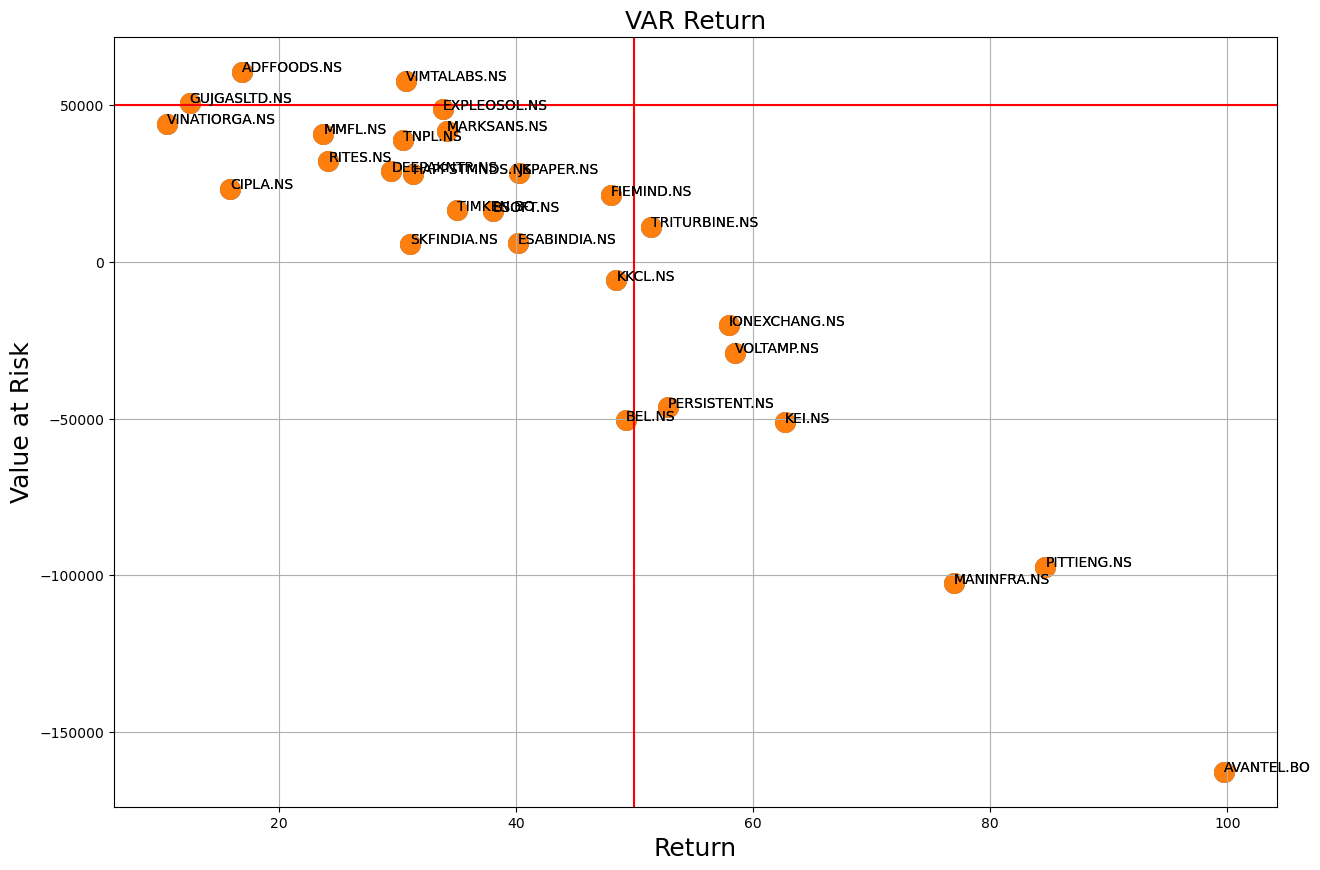

In [47]:
plt.figure(figsize=[15,10])
x= df2['Return%']
y = df2['Value at Risk']
annotations = df2["Ticker"]
plt.grid(True)
plt.title('VAR Return', fontsize=18, color='black')
plt.xlabel("Return",fontsize=18, color='black')
plt.ylabel("Value at Risk", fontsize=18, color='black') 
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50000, color='r', linestyle='-')
plt.show()

plt.show()

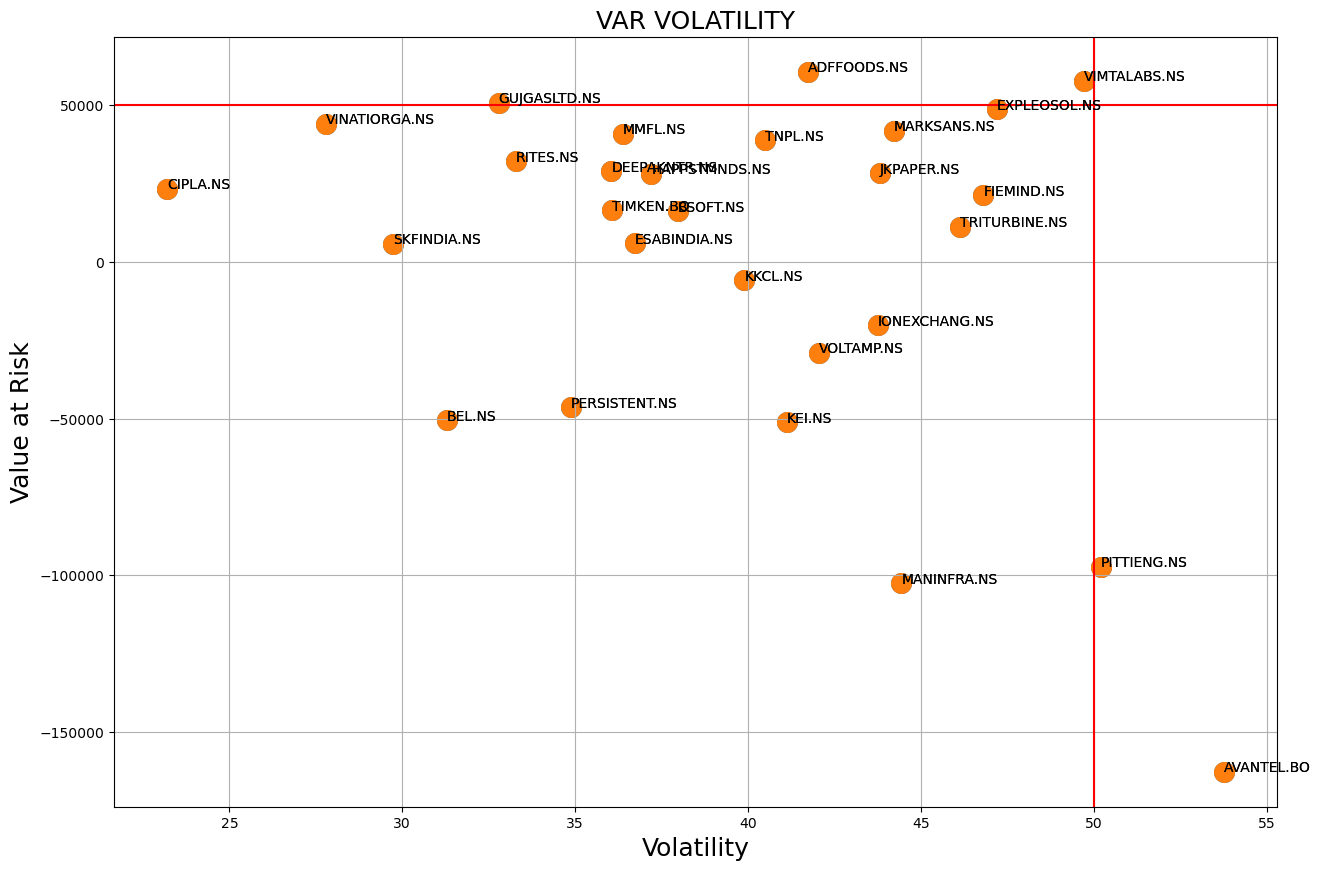

In [48]:
plt.figure(figsize=[15,10])
x= df2['Volatility%']
y = df2['Value at Risk']
annotations = df2["Ticker"]
plt.grid(True)
plt.title('VAR VOLATILITY', fontsize=18, color='black')
plt.xlabel("Volatility",fontsize=18, color='black')
plt.ylabel("Value at Risk", fontsize=18, color='black') 
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50000, color='r', linestyle='-')
plt.show()

plt.show()

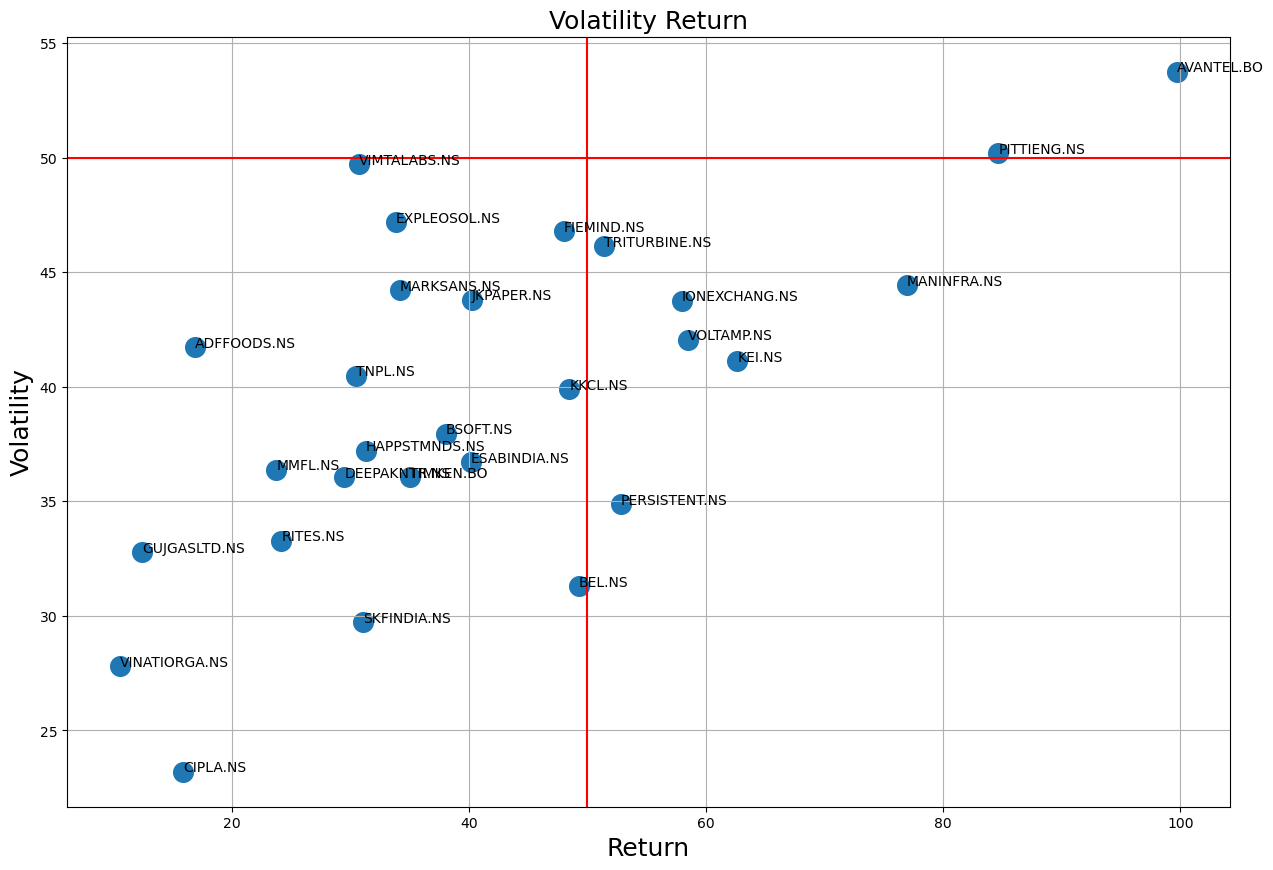

In [49]:
plt.figure(figsize=[15,10])
x= df2['Return%']
y = df2['Volatility%']
annotations = np.array(df2["Ticker"])
plt.grid(True)
plt.title('Volatility Return', fontsize=18, color='black')
plt.xlabel("Return",fontsize=18, color='black')
plt.ylabel("Volatility", fontsize=18, color='black') 
plt.scatter(x, y,s=200 )
i=0
for labels in annotations:
    plt.annotate(labels, (x[i], y[i]))
    i=i+1
plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50, color='r', linestyle='-')
plt.show()

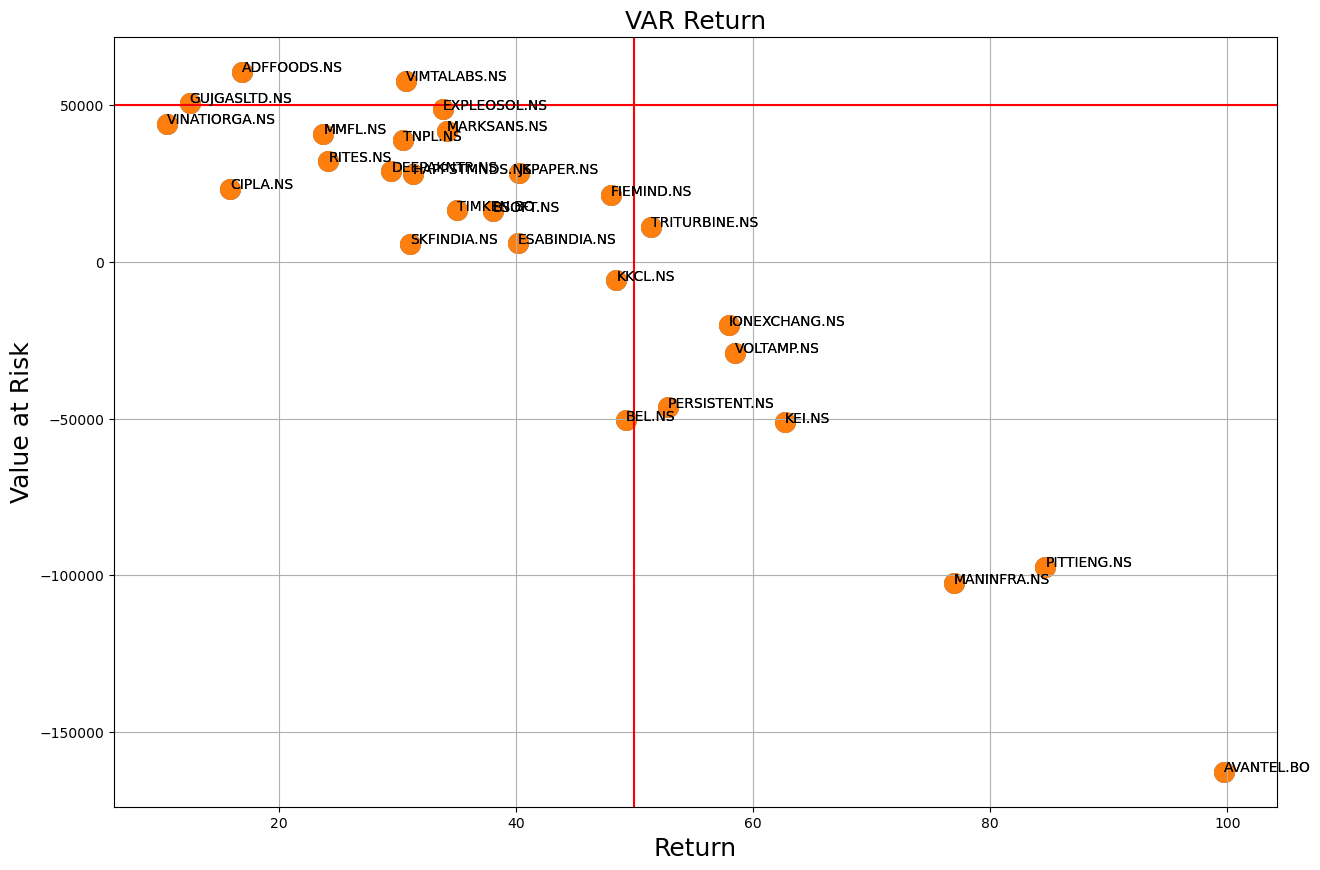

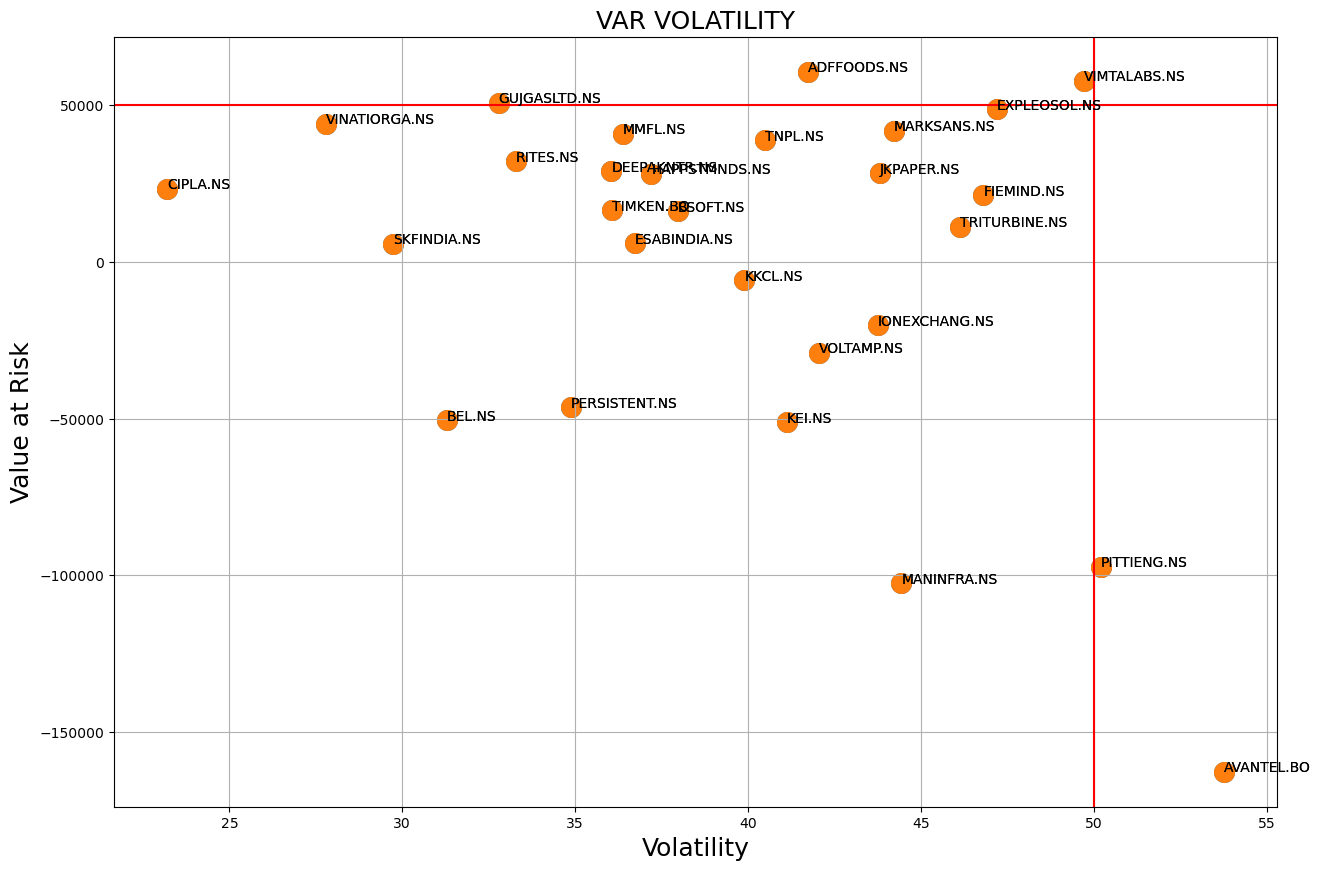

In [50]:
plt.figure(figsize=[15,10])
x= df2['Return%']
y = df2['Value at Risk']
annotations = df2["Ticker"]
plt.grid(True)
plt.title('VAR Return', fontsize=18, color='black')
plt.xlabel("Return",fontsize=18, color='black')
plt.ylabel("Value at Risk", fontsize=18, color='black') 
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50000, color='r', linestyle='-')
plt.show()

plt.figure(figsize=[15,10])
x= df2['Volatility%']
y = df2['Value at Risk']
annotations = df2["Ticker"]
plt.grid(True)
plt.title('VAR VOLATILITY', fontsize=18, color='black')
plt.xlabel("Volatility",fontsize=18, color='black')
plt.ylabel("Value at Risk", fontsize=18, color='black') 
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50000, color='r', linestyle='-')
plt.show()

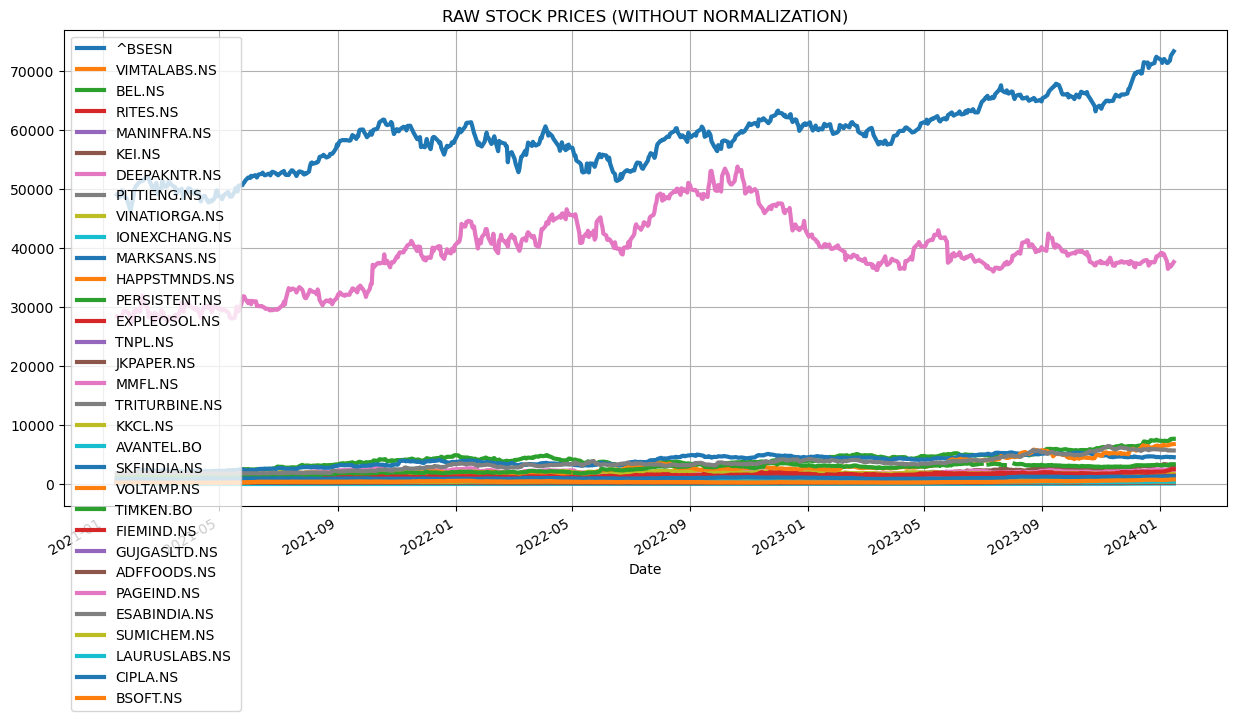

In [51]:
stocks_df = data
def show_plot(df, fig_title):
  df.plot(x = 'Date', figsize = (15,7), linewidth = 3, title = fig_title)
  plt.grid()
  plt.show()
stocks_df = stocks_df.reset_index()
show_plot(stocks_df, 'RAW STOCK PRICES (WITHOUT NORMALIZATION)')

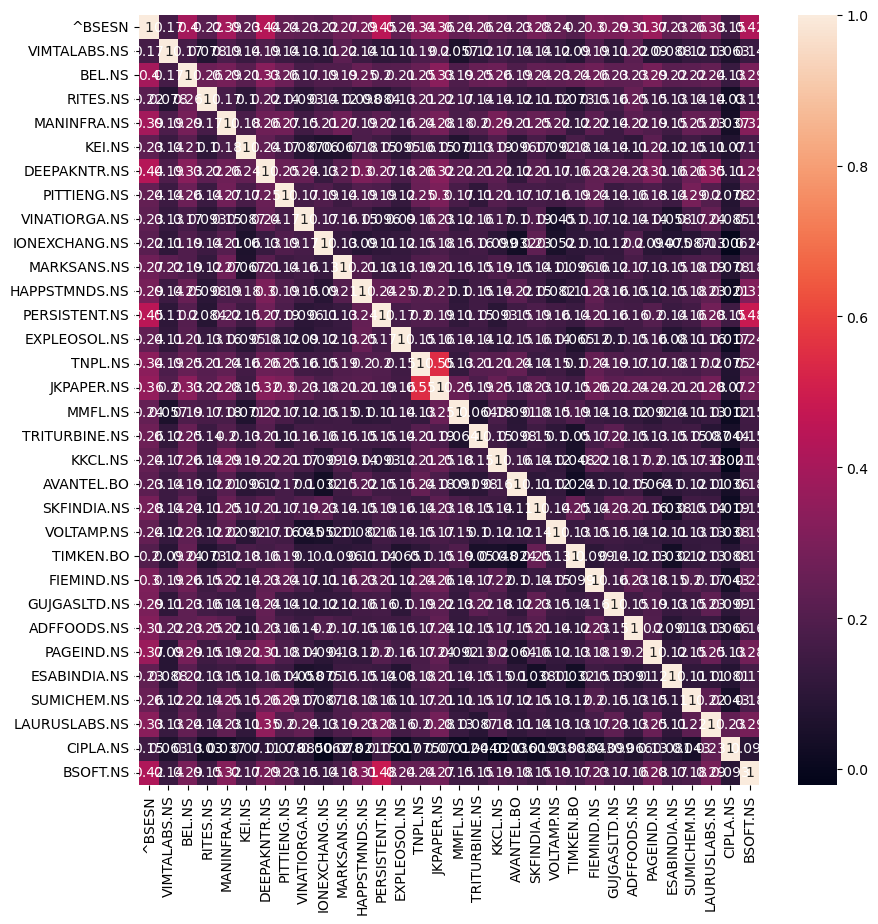

In [52]:
def daily_return(df):
  df_daily_return = df.copy()

  # Loop through each stock (while ignoring time columns with index 0)
  for i in df.columns[1:]:
    
    # Loop through each row belonging to the stock
    for j in range(1, len(df)):

      # Calculate the percentage of change from the previous day
      df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100
    
    # set the value of first row to zero since the previous value is not available
    df_daily_return[i][0] = 0
  
  return df_daily_return

# Get the daily returns 
stocks_daily_return = daily_return(stocks_df)

# Daily Return Correlation
cm = stocks_daily_return.drop(columns = ['Date']).corr()

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
plt.figure(figsize=(10, 10))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax);

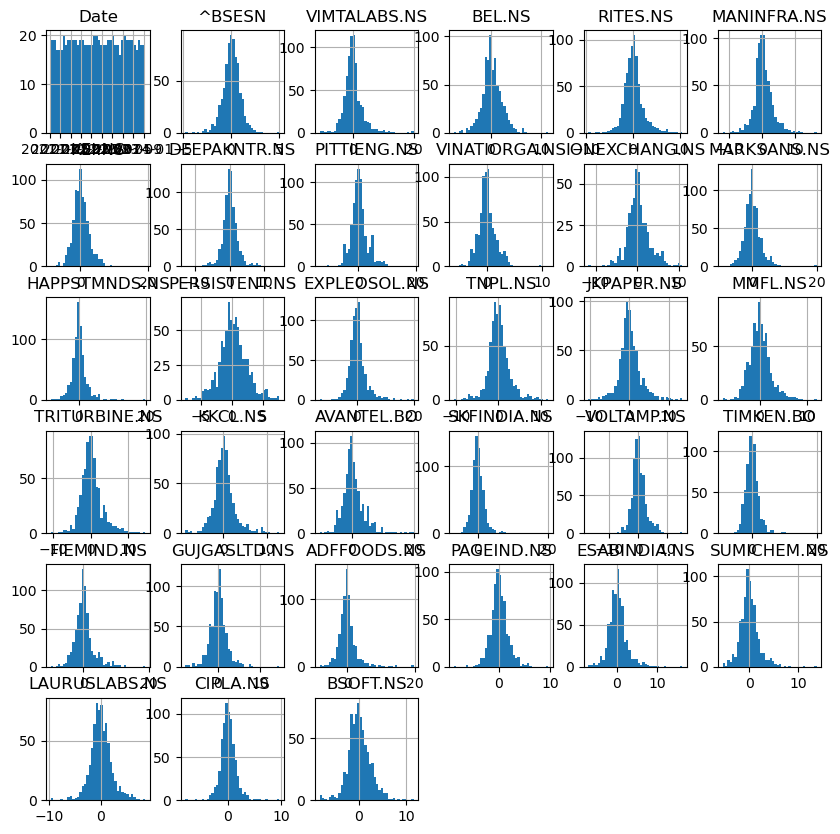

In [53]:
# Histogram of daily returns
# Stock returns are normally distributed with zero mean 
# Notice how Tesla Standard deviation is high indicating a more volatile stock
stocks_daily_return.hist(figsize=(10, 10), bins = 40);

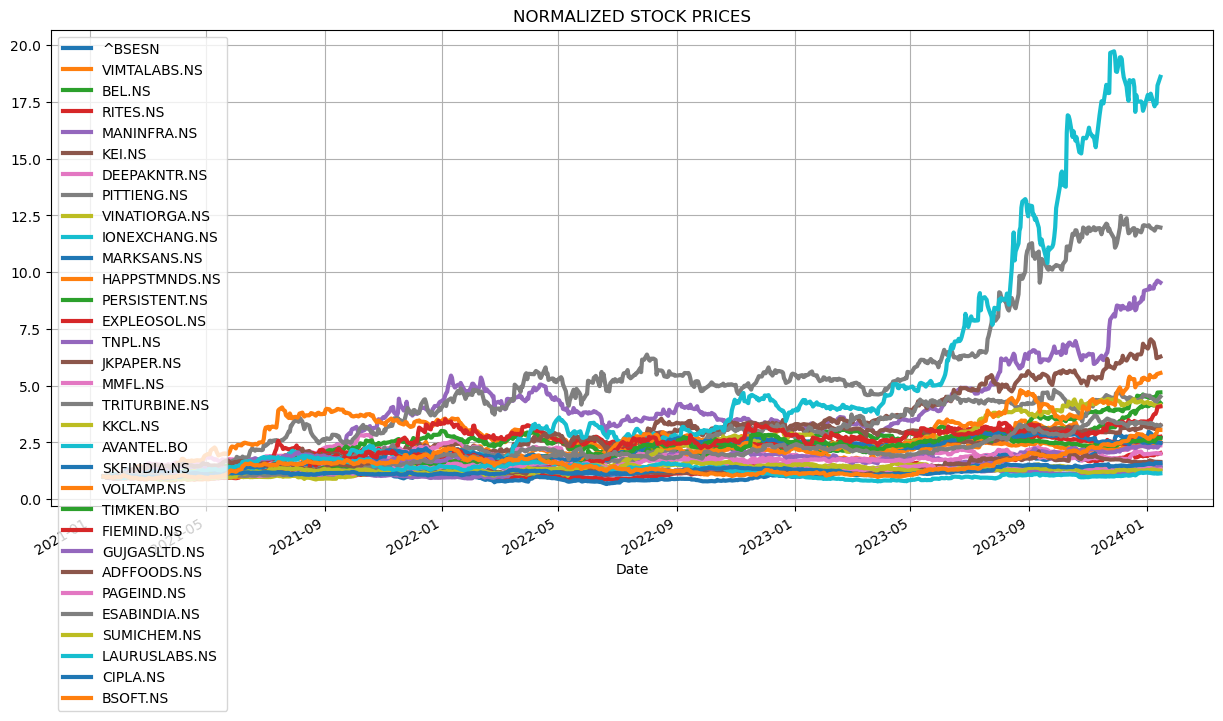

In [54]:
# Function to normalize the prices based on the initial price
# The function simply divides every stock by it's price at the start date (i.e.: Date = 2012-01-12)	
def normalize(df):
  x = df.copy()

  # Loop through each stock (while ignoring time columns with index 0)
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

# Plot normalized data
# Notice the massive gains in Tesla Stock compared to Amazon (second place)
show_plot(normalize(stocks_df), 'NORMALIZED STOCK PRICES')

In [55]:
patterns = {
    'CDL2CROWS':'Two Crows',
    'CDL3BLACKCROWS':'Three Black Crows',
    'CDL3INSIDE':'Three Inside Up/Down',
    'CDL3LINESTRIKE':'Three-Line Strike',
    'CDL3OUTSIDE':'Three Outside Up/Down',
    'CDL3STARSINSOUTH':'Three Stars In The South',
    'CDL3WHITESOLDIERS':'Three Advancing White Soldiers',
    'CDLABANDONEDBABY':'Abandoned Baby',
    'CDLADVANCEBLOCK':'Advance Block',
    'CDLBELTHOLD':'Belt-hold',
    'CDLBREAKAWAY':'Breakaway',
    'CDLCLOSINGMARUBOZU':'Closing Marubozu',
    'CDLCONCEALBABYSWALL':'Concealing Baby Swallow',
    'CDLCOUNTERATTACK':'Counterattack',
    'CDLDARKCLOUDCOVER':'Dark Cloud Cover',
    'CDLDOJI':'Doji',
    'CDLDOJISTAR':'Doji Star',
    'CDLDRAGONFLYDOJI':'Dragonfly Doji',
    'CDLENGULFING':'Engulfing Pattern',
    'CDLEVENINGDOJISTAR':'Evening Doji Star',
    'CDLEVENINGSTAR':'Evening Star',
    'CDLGAPSIDESIDEWHITE':'Up/Down-gap side-by-side white lines',
    'CDLGRAVESTONEDOJI':'Gravestone Doji',
    'CDLHAMMER':'Hammer',
    'CDLHANGINGMAN':'Hanging Man',
    'CDLHARAMI':'Harami Pattern',
    'CDLHARAMICROSS':'Harami Cross Pattern',
    'CDLHIGHWAVE':'High-Wave Candle',
    'CDLHIKKAKE':'Hikkake Pattern',
    'CDLHIKKAKEMOD':'Modified Hikkake Pattern',
    'CDLHOMINGPIGEON':'Homing Pigeon',
    'CDLIDENTICAL3CROWS':'Identical Three Crows',
    'CDLINNECK':'In-Neck Pattern',
    'CDLINVERTEDHAMMER':'Inverted Hammer',
    'CDLKICKING':'Kicking',
    'CDLKICKINGBYLENGTH':'Kicking - bull/bear determined by the longer marubozu',
    'CDLLADDERBOTTOM':'Ladder Bottom',
    'CDLLONGLEGGEDDOJI':'Long Legged Doji',
    'CDLLONGLINE':'Long Line Candle',
    'CDLMARUBOZU':'Marubozu',
    'CDLMATCHINGLOW':'Matching Low',
    'CDLMATHOLD':'Mat Hold',
    'CDLMORNINGDOJISTAR':'Morning Doji Star',
    'CDLMORNINGSTAR':'Morning Star',
    'CDLONNECK':'On-Neck Pattern',
    'CDLPIERCING':'Piercing Pattern',
    'CDLRICKSHAWMAN':'Rickshaw Man',
    'CDLRISEFALL3METHODS':'Rising/Falling Three Methods',
    'CDLSEPARATINGLINES':'Separating Lines',
    'CDLSHOOTINGSTAR':'Shooting Star',
    'CDLSHORTLINE':'Short Line Candle',
    'CDLSPINNINGTOP':'Spinning Top',
    'CDLSTALLEDPATTERN':'Stalled Pattern',
    'CDLSTICKSANDWICH':'Stick Sandwich',
    'CDLTAKURI':'Takuri (Dragonfly Doji with very long lower shadow)',
    'CDLTASUKIGAP':'Tasuki Gap',
    'CDLTHRUSTING':'Thrusting Pattern',
    'CDLTRISTAR':'Tristar Pattern',
    'CDLUNIQUE3RIVER':'Unique 3 River',
    'CDLUPSIDEGAP2CROWS':'Upside Gap Two Crows',
    'CDLXSIDEGAP3METHODS':'Upside/Downside Gap Three Methods'
}

In [56]:
import os, csv
import pandas as pd
import yfinance as yf
import talib

import datetime
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go

def candle_trend(patterns,tickers):
    
    data = pd.DataFrame(columns=['Ticker','Candle-Pattern','Definition','Signal'])
    for t in tickers:
        try: 
            df = yf.download(t, period="4y") 
    
        
            for pattern in patterns:
                ta_function = getattr(talib, pattern)
                result = ta_function(df['Open'], df['High'], df['Low'], df['Close'])
                last_pattern = result.tail(1).values[0]
                if last_pattern > 0:
                    data = data.append(pd.Series([t,pattern,patterns[pattern],"BULLISH"],index=data.columns), ignore_index=True)
                
                
                elif last_pattern < 0:
                    data = data.append(pd.Series([t,pattern,patterns[pattern],"BEAR"],index=data.columns), ignore_index=True)
        except:
            continue

    return data
g=candle_trend(patterns,tickers)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [57]:
g

Empty DataFrame
Columns: [Ticker, Candle-Pattern, Definition, Signal]
Index: []

In [58]:
g.Ticker.unique()

array([], dtype=object)

In [59]:
g['Candle-Pattern'].unique()

array([], dtype=object)

In [60]:
df2.head(20)

index         Ticker   Cov_mar  Market_var      Beta  Volatility%  \
0      18     AVANTEL.BO  0.018477    0.021896  0.843826    53.760899   
1       6    PITTIENG.NS  0.018121    0.021896  0.827579    50.195453   
2       3    MANINFRA.NS  0.026236    0.021896  1.198195    44.428482   
3       4         KEI.NS  0.014068    0.021896  0.642502    41.124721   
4      20     VOLTAMP.NS  0.015118    0.021896  0.690461    42.059994   
5       8  IONEXCHANG.NS  0.013299    0.021896  0.607354    43.762311   
6      11  PERSISTENT.NS  0.023313    0.021896  1.064691    34.870841   
7      16  TRITURBINE.NS  0.018363    0.021896  0.838648    46.132912   
8       1         BEL.NS  0.018502    0.021896  0.844977    31.286945   
9      17        KKCL.NS  0.014472    0.021896  0.660950    39.891371   
10     22     FIEMIND.NS  0.021288    0.021896  0.972213    46.805087   
11     14     JKPAPER.NS  0.023515    0.021896  1.073931    43.812470   
12     26   ESABINDIA.NS  0.012894    0.021896  0.588890    36.723702   
13     30       BSOFT.NS  0.023805    0.021896  1.087178    37.961862   
14     21      TIMKEN.BO  0.010921    0.021896  0.498752    36.065179   
15      9    MARKSANS.NS  0.018063    0.021896  0.824940    44.222657   
16     12   EXPLEOSOL.NS  0.016791    0.021896  0.766829    47.191568   
17     10  HAPPSTMNDS.NS  0.016318    0.021896  0.745257    37.207470   
18     19    SKFINDIA.NS  0.012707    0.021896  0.580336    29.731473   
19      0   VIMTALABS.NS  0.012388    0.021896  0.565739    49.718424   

      Return%          CV  Sharp Ratio        CAGR     MAXDD%  Value at Risk  
0   99.695904   53.924882     1.761427  170.637961  31.118336 -162717.526825  
1   84.650467   59.297314     1.586806  132.881778  31.922989  -97319.311783  
2   76.928683   57.752817     1.618977  115.598405  48.152470 -102587.481752  
3   62.655356   65.636401     1.401963   86.956703  21.472188  -51247.344405  
4   58.501502   71.895579     1.272028   79.359944  31.442913  -28967.309861  
5   57.981288   75.476611     1.210660   44.182394  23.809918  -20124.359898  
6   52.816731   66.022339     1.371253   69.461160  36.085400  -46290.722688  
7   51.420207   89.717475     1.006228   67.114197  31.684732   11254.369212  
8   49.267153   63.504673     1.414876   63.559354  22.007849  -50507.109733  
9   48.470871   82.299679     1.089731   62.263877  33.172127   -5880.349216  
10  47.996681   97.517341     0.918633   61.497295  38.504080   21306.491575  
11  40.271313  108.793250     0.805052   49.506387  31.294038   28296.766652  
12  40.186747   91.382619     0.958148   49.380179  22.852517    5934.020815  
13  38.051209   99.765193     0.870642   46.228149  56.391823   16150.772130  
14  35.030957  102.952310     0.832686   40.194322  24.430418   16472.988951  
15  34.179006  129.385439     0.659820   40.681486  58.276045   41872.505151  
16  33.840841  139.451524     0.611144   41.140709  36.096971   48667.265830  
17  31.301597  118.867642     0.706890   36.696503  49.800145   28121.276509  
18  31.064648   95.708386     0.876669   36.373422  24.793149    5801.514631  
19  30.739944  161.738825     0.517714   37.035869  39.961254   57857.689861

In [61]:
df2[(df2['CAGR']>15 ) & (df2['Return%']>15)]

index         Ticker   Cov_mar  Market_var      Beta  Volatility%  \
0      18     AVANTEL.BO  0.018477    0.021896  0.843826    53.760899   
1       6    PITTIENG.NS  0.018121    0.021896  0.827579    50.195453   
2       3    MANINFRA.NS  0.026236    0.021896  1.198195    44.428482   
3       4         KEI.NS  0.014068    0.021896  0.642502    41.124721   
4      20     VOLTAMP.NS  0.015118    0.021896  0.690461    42.059994   
5       8  IONEXCHANG.NS  0.013299    0.021896  0.607354    43.762311   
6      11  PERSISTENT.NS  0.023313    0.021896  1.064691    34.870841   
7      16  TRITURBINE.NS  0.018363    0.021896  0.838648    46.132912   
8       1         BEL.NS  0.018502    0.021896  0.844977    31.286945   
9      17        KKCL.NS  0.014472    0.021896  0.660950    39.891371   
10     22     FIEMIND.NS  0.021288    0.021896  0.972213    46.805087   
11     14     JKPAPER.NS  0.023515    0.021896  1.073931    43.812470   
12     26   ESABINDIA.NS  0.012894    0.021896  0.588890    36.723702   
13     30       BSOFT.NS  0.023805    0.021896  1.087178    37.961862   
14     21      TIMKEN.BO  0.010921    0.021896  0.498752    36.065179   
15      9    MARKSANS.NS  0.018063    0.021896  0.824940    44.222657   
16     12   EXPLEOSOL.NS  0.016791    0.021896  0.766829    47.191568   
17     10  HAPPSTMNDS.NS  0.016318    0.021896  0.745257    37.207470   
18     19    SKFINDIA.NS  0.012707    0.021896  0.580336    29.731473   
19      0   VIMTALABS.NS  0.012388    0.021896  0.565739    49.718424   
20     13        TNPL.NS  0.020547    0.021896  0.938381    40.492744   
21      5   DEEPAKNTR.NS  0.023505    0.021896  1.073486    36.045099   
22      2       RITES.NS  0.010801    0.021896  0.493272    33.284308   
23     15        MMFL.NS  0.013327    0.021896  0.608639    36.385644   
24     24    ADFFOODS.NS  0.019714    0.021896  0.900335    41.734702   
25     29       CIPLA.NS  0.005265    0.021896  0.240458    23.195250   

      Return%          CV  Sharp Ratio        CAGR     MAXDD%  Value at Risk  
0   99.695904   53.924882     1.761427  170.637961  31.118336 -162717.526825  
1   84.650467   59.297314     1.586806  132.881778  31.922989  -97319.311783  
2   76.928683   57.752817     1.618977  115.598405  48.152470 -102587.481752  
3   62.655356   65.636401     1.401963   86.956703  21.472188  -51247.344405  
4   58.501502   71.895579     1.272028   79.359944  31.442913  -28967.309861  
5   57.981288   75.476611     1.210660   44.182394  23.809918  -20124.359898  
6   52.816731   66.022339     1.371253   69.461160  36.085400  -46290.722688  
7   51.420207   89.717475     1.006228   67.114197  31.684732   11254.369212  
8   49.267153   63.504673     1.414876   63.559354  22.007849  -50507.109733  
9   48.470871   82.299679     1.089731   62.263877  33.172127   -5880.349216  
10  47.996681   97.517341     0.918633   61.497295  38.504080   21306.491575  
11  40.271313  108.793250     0.805052   49.506387  31.294038   28296.766652  
12  40.186747   91.382619     0.958148   49.380179  22.852517    5934.020815  
13  38.051209   99.765193     0.870642   46.228149  56.391823   16150.772130  
14  35.030957  102.952310     0.832686   40.194322  24.430418   16472.988951  
15  34.179006  129.385439     0.659820   40.681486  58.276045   41872.505151  
16  33.840841  139.451524     0.611144   41.140709  36.096971   48667.265830  
17  31.301597  118.867642     0.706890   36.696503  49.800145   28121.276509  
18  31.064648   95.708386     0.876669   36.373422  24.793149    5801.514631  
19  30.739944  161.738825     0.517714   37.035869  39.961254   57857.689861  
20  30.465404  132.913857     0.628888   35.559754  33.446909   38783.305682  
21  29.501798  122.179332     0.679754   34.261513  41.228339   28873.275452  
22  24.182849  137.636006     0.576333   27.315962  26.229774   32188.520036  
23  23.772967  153.054703     0.515944   26.795887  29.965533   40873.856842  
24  16.894205  247.035601     0.284996   18.378124  36.91

In [62]:
df2[(df2['CAGR']>15 ) & (df2['Return%']>15) & (df2['Volatility%']<50)]

index         Ticker   Cov_mar  Market_var      Beta  Volatility%  \
2       3    MANINFRA.NS  0.026236    0.021896  1.198195    44.428482   
3       4         KEI.NS  0.014068    0.021896  0.642502    41.124721   
4      20     VOLTAMP.NS  0.015118    0.021896  0.690461    42.059994   
5       8  IONEXCHANG.NS  0.013299    0.021896  0.607354    43.762311   
6      11  PERSISTENT.NS  0.023313    0.021896  1.064691    34.870841   
7      16  TRITURBINE.NS  0.018363    0.021896  0.838648    46.132912   
8       1         BEL.NS  0.018502    0.021896  0.844977    31.286945   
9      17        KKCL.NS  0.014472    0.021896  0.660950    39.891371   
10     22     FIEMIND.NS  0.021288    0.021896  0.972213    46.805087   
11     14     JKPAPER.NS  0.023515    0.021896  1.073931    43.812470   
12     26   ESABINDIA.NS  0.012894    0.021896  0.588890    36.723702   
13     30       BSOFT.NS  0.023805    0.021896  1.087178    37.961862   
14     21      TIMKEN.BO  0.010921    0.021896  0.498752    36.065179   
15      9    MARKSANS.NS  0.018063    0.021896  0.824940    44.222657   
16     12   EXPLEOSOL.NS  0.016791    0.021896  0.766829    47.191568   
17     10  HAPPSTMNDS.NS  0.016318    0.021896  0.745257    37.207470   
18     19    SKFINDIA.NS  0.012707    0.021896  0.580336    29.731473   
19      0   VIMTALABS.NS  0.012388    0.021896  0.565739    49.718424   
20     13        TNPL.NS  0.020547    0.021896  0.938381    40.492744   
21      5   DEEPAKNTR.NS  0.023505    0.021896  1.073486    36.045099   
22      2       RITES.NS  0.010801    0.021896  0.493272    33.284308   
23     15        MMFL.NS  0.013327    0.021896  0.608639    36.385644   
24     24    ADFFOODS.NS  0.019714    0.021896  0.900335    41.734702   
25     29       CIPLA.NS  0.005265    0.021896  0.240458    23.195250   

      Return%          CV  Sharp Ratio        CAGR     MAXDD%  Value at Risk  
2   76.928683   57.752817     1.618977  115.598405  48.152470 -102587.481752  
3   62.655356   65.636401     1.401963   86.956703  21.472188  -51247.344405  
4   58.501502   71.895579     1.272028   79.359944  31.442913  -28967.309861  
5   57.981288   75.476611     1.210660   44.182394  23.809918  -20124.359898  
6   52.816731   66.022339     1.371253   69.461160  36.085400  -46290.722688  
7   51.420207   89.717475     1.006228   67.114197  31.684732   11254.369212  
8   49.267153   63.504673     1.414876   63.559354  22.007849  -50507.109733  
9   48.470871   82.299679     1.089731   62.263877  33.172127   -5880.349216  
10  47.996681   97.517341     0.918633   61.497295  38.504080   21306.491575  
11  40.271313  108.793250     0.805052   49.506387  31.294038   28296.766652  
12  40.186747   91.382619     0.958148   49.380179  22.852517    5934.020815  
13  38.051209   99.765193     0.870642   46.228149  56.391823   16150.772130  
14  35.030957  102.952310     0.832686   40.194322  24.430418   16472.988951  
15  34.179006  129.385439     0.659820   40.681486  58.276045   41872.505151  
16  33.840841  139.451524     0.611144   41.140709  36.096971   48667.265830  
17  31.301597  118.867642     0.706890   36.696503  49.800145   28121.276509  
18  31.064648   95.708386     0.876669   36.373422  24.793149    5801.514631  
19  30.739944  161.738825     0.517714   37.035869  39.961254   57857.689861  
20  30.465404  132.913857     0.628888   35.559754  33.446909   38783.305682  
21  29.501798  122.179332     0.679754   34.261513  41.228339   28873.275452  
22  24.182849  137.636006     0.576333   27.315962  26.229774   32188.520036  
23  23.772967  153.054703     0.515944   26.795887  29.965533   40873.856842  
24  16.894205  247.035601     0.284996   18.378124  36.913755   60670.598206  
25  15.903544  145.849568     0.470077   17.212756  26.508441   23396.494072

In [63]:
np.corrcoef(df1['CV'], df1['Value at Risk'])[0][1]

0.7028444595278184

In [64]:
def t_stat_corr(df, x, y):
    """Returns the t-statistic for the correlation between 2 variables"""
    corr_xy = np.corrcoef(df[x], df[y])[0][1]
    n = len(df)
    
    t_stat = (corr_xy * np.sqrt(n - 2)) / np.sqrt(1 - corr_xy ** 2)
    
    return t_stat

In [65]:
# H1
t_stat_corr(df=df1, y='Value at Risk', x='CV')

5.038096633897107

In [66]:
t_stat_corr(df=df1, y='Return%', x='CV')

-6.673671185135431

In [67]:
t_stat_corr(df=df1, y='Volatility%', x='Return%')

4.296699629332973

In [68]:
t_stat_corr(df=df1, y='Volatility%', x='CV')

-1.9016984137404243

In [69]:
t_stat_corr(df=df1, y='Volatility%', x='MAXDD%')

1.200197919219587

In [70]:

t_stat_corr(df=df1, y='Return%', x='MAXDD%')

-0.5114968282737278

In [71]:
df2[(df2['CAGR']>20 ) & (df2['Return%']>20) & (df2['Volatility%']<50)]

index         Ticker   Cov_mar  Market_var      Beta  Volatility%  \
2       3    MANINFRA.NS  0.026236    0.021896  1.198195    44.428482   
3       4         KEI.NS  0.014068    0.021896  0.642502    41.124721   
4      20     VOLTAMP.NS  0.015118    0.021896  0.690461    42.059994   
5       8  IONEXCHANG.NS  0.013299    0.021896  0.607354    43.762311   
6      11  PERSISTENT.NS  0.023313    0.021896  1.064691    34.870841   
7      16  TRITURBINE.NS  0.018363    0.021896  0.838648    46.132912   
8       1         BEL.NS  0.018502    0.021896  0.844977    31.286945   
9      17        KKCL.NS  0.014472    0.021896  0.660950    39.891371   
10     22     FIEMIND.NS  0.021288    0.021896  0.972213    46.805087   
11     14     JKPAPER.NS  0.023515    0.021896  1.073931    43.812470   
12     26   ESABINDIA.NS  0.012894    0.021896  0.588890    36.723702   
13     30       BSOFT.NS  0.023805    0.021896  1.087178    37.961862   
14     21      TIMKEN.BO  0.010921    0.021896  0.498752    36.065179   
15      9    MARKSANS.NS  0.018063    0.021896  0.824940    44.222657   
16     12   EXPLEOSOL.NS  0.016791    0.021896  0.766829    47.191568   
17     10  HAPPSTMNDS.NS  0.016318    0.021896  0.745257    37.207470   
18     19    SKFINDIA.NS  0.012707    0.021896  0.580336    29.731473   
19      0   VIMTALABS.NS  0.012388    0.021896  0.565739    49.718424   
20     13        TNPL.NS  0.020547    0.021896  0.938381    40.492744   
21      5   DEEPAKNTR.NS  0.023505    0.021896  1.073486    36.045099   
22      2       RITES.NS  0.010801    0.021896  0.493272    33.284308   
23     15        MMFL.NS  0.013327    0.021896  0.608639    36.385644   

      Return%          CV  Sharp Ratio        CAGR     MAXDD%  Value at Risk  
2   76.928683   57.752817     1.618977  115.598405  48.152470 -102587.481752  
3   62.655356   65.636401     1.401963   86.956703  21.472188  -51247.344405  
4   58.501502   71.895579     1.272028   79.359944  31.442913  -28967.309861  
5   57.981288   75.476611     1.210660   44.182394  23.809918  -20124.359898  
6   52.816731   66.022339     1.371253   69.461160  36.085400  -46290.722688  
7   51.420207   89.717475     1.006228   67.114197  31.684732   11254.369212  
8   49.267153   63.504673     1.414876   63.559354  22.007849  -50507.109733  
9   48.470871   82.299679     1.089731   62.263877  33.172127   -5880.349216  
10  47.996681   97.517341     0.918633   61.497295  38.504080   21306.491575  
11  40.271313  108.793250     0.805052   49.506387  31.294038   28296.766652  
12  40.186747   91.382619     0.958148   49.380179  22.852517    5934.020815  
13  38.051209   99.765193     0.870642   46.228149  56.391823   16150.772130  
14  35.030957  102.952310     0.832686   40.194322  24.430418   16472.988951  
15  34.179006  129.385439     0.659820   40.681486  58.276045   41872.505151  
16  33.840841  139.451524     0.611144   41.140709  36.096971   48667.265830  
17  31.301597  118.867642     0.706890   36.696503  49.800145   28121.276509  
18  31.064648   95.708386     0.876669   36.373422  24.793149    5801.514631  
19  30.739944  161.738825     0.517714   37.035869  39.961254   57857.689861  
20  30.465404  132.913857     0.628888   35.559754  33.446909   38783.305682  
21  29.501798  122.179332     0.679754   34.261513  41.228339   28873.275452  
22  24.182849  137.636006     0.576333   27.315962  26.229774   32188.520036  
23  23.772967  153.054703     0.515944   26.795887  29.965533   40873.856842

In [72]:
df3 = df2[(df2['CAGR']>20 ) & (df2['Return%']>20) & (df2['Volatility%']<50) & (df2['Value at Risk']<52000)]
df3

index         Ticker   Cov_mar  Market_var      Beta  Volatility%  \
2       3    MANINFRA.NS  0.026236    0.021896  1.198195    44.428482   
3       4         KEI.NS  0.014068    0.021896  0.642502    41.124721   
4      20     VOLTAMP.NS  0.015118    0.021896  0.690461    42.059994   
5       8  IONEXCHANG.NS  0.013299    0.021896  0.607354    43.762311   
6      11  PERSISTENT.NS  0.023313    0.021896  1.064691    34.870841   
7      16  TRITURBINE.NS  0.018363    0.021896  0.838648    46.132912   
8       1         BEL.NS  0.018502    0.021896  0.844977    31.286945   
9      17        KKCL.NS  0.014472    0.021896  0.660950    39.891371   
10     22     FIEMIND.NS  0.021288    0.021896  0.972213    46.805087   
11     14     JKPAPER.NS  0.023515    0.021896  1.073931    43.812470   
12     26   ESABINDIA.NS  0.012894    0.021896  0.588890    36.723702   
13     30       BSOFT.NS  0.023805    0.021896  1.087178    37.961862   
14     21      TIMKEN.BO  0.010921    0.021896  0.498752    36.065179   
15      9    MARKSANS.NS  0.018063    0.021896  0.824940    44.222657   
16     12   EXPLEOSOL.NS  0.016791    0.021896  0.766829    47.191568   
17     10  HAPPSTMNDS.NS  0.016318    0.021896  0.745257    37.207470   
18     19    SKFINDIA.NS  0.012707    0.021896  0.580336    29.731473   
20     13        TNPL.NS  0.020547    0.021896  0.938381    40.492744   
21      5   DEEPAKNTR.NS  0.023505    0.021896  1.073486    36.045099   
22      2       RITES.NS  0.010801    0.021896  0.493272    33.284308   
23     15        MMFL.NS  0.013327    0.021896  0.608639    36.385644   

      Return%          CV  Sharp Ratio        CAGR     MAXDD%  Value at Risk  
2   76.928683   57.752817     1.618977  115.598405  48.152470 -102587.481752  
3   62.655356   65.636401     1.401963   86.956703  21.472188  -51247.344405  
4   58.501502   71.895579     1.272028   79.359944  31.442913  -28967.309861  
5   57.981288   75.476611     1.210660   44.182394  23.809918  -20124.359898  
6   52.816731   66.022339     1.371253   69.461160  36.085400  -46290.722688  
7   51.420207   89.717475     1.006228   67.114197  31.684732   11254.369212  
8   49.267153   63.504673     1.414876   63.559354  22.007849  -50507.109733  
9   48.470871   82.299679     1.089731   62.263877  33.172127   -5880.349216  
10  47.996681   97.517341     0.918633   61.497295  38.504080   21306.491575  
11  40.271313  108.793250     0.805052   49.506387  31.294038   28296.766652  
12  40.186747   91.382619     0.958148   49.380179  22.852517    5934.020815  
13  38.051209   99.765193     0.870642   46.228149  56.391823   16150.772130  
14  35.030957  102.952310     0.832686   40.194322  24.430418   16472.988951  
15  34.179006  129.385439     0.659820   40.681486  58.276045   41872.505151  
16  33.840841  139.451524     0.611144   41.140709  36.096971   48667.265830  
17  31.301597  118.867642     0.706890   36.696503  49.800145   28121.276509  
18  31.064648   95.708386     0.876669   36.373422  24.793149    5801.514631  
20  30.465404  132.913857     0.628888   35.559754  33.446909   38783.305682  
21  29.501798  122.179332     0.679754   34.261513  41.228339   28873.275452  
22  24.182849  137.636006     0.576333   27.315962  26.229774   32188.520036  
23  23.772967  153.054703     0.515944   26.795887  29.965533   40873.856842

In [73]:
df3.reset_index(inplace = True)

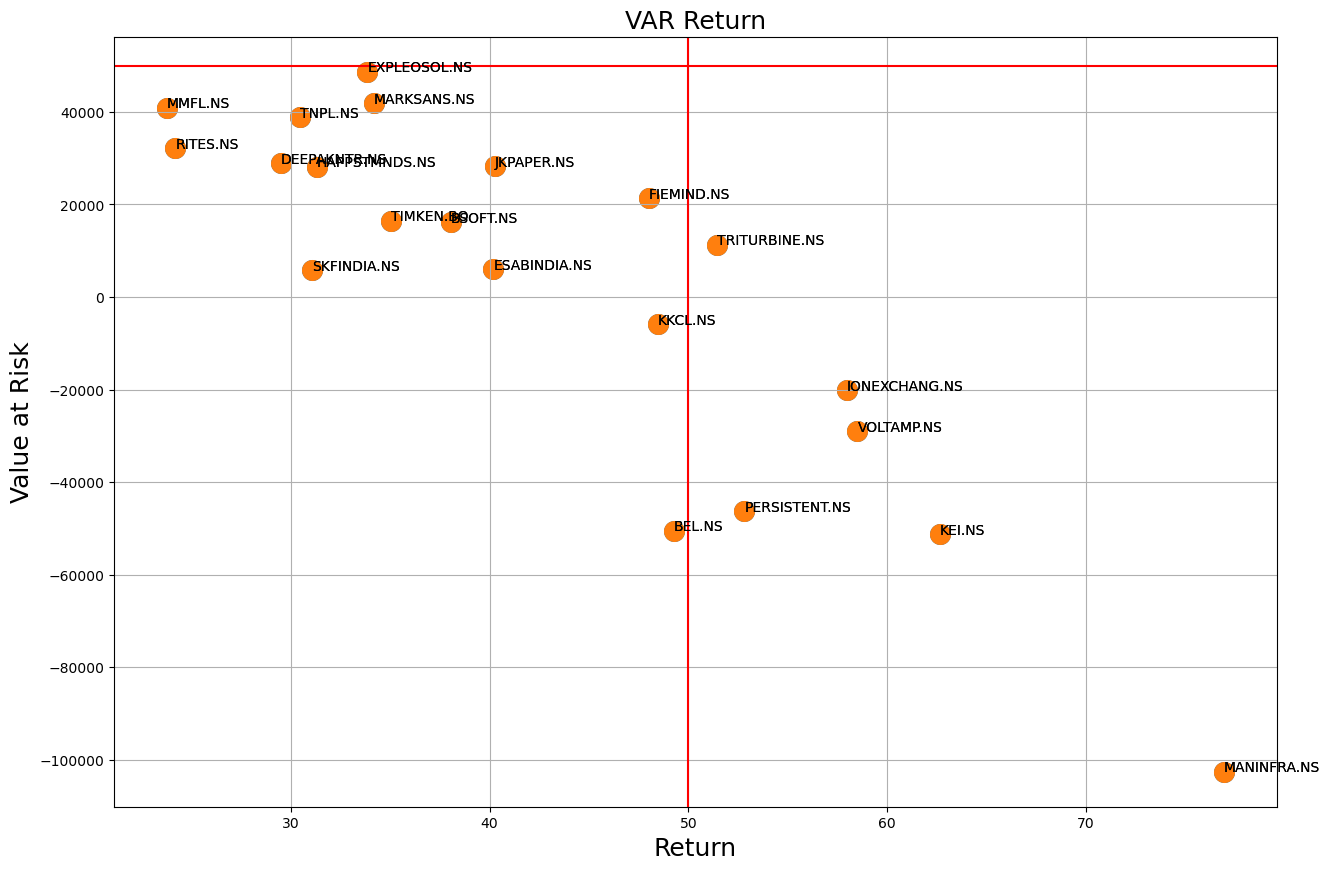

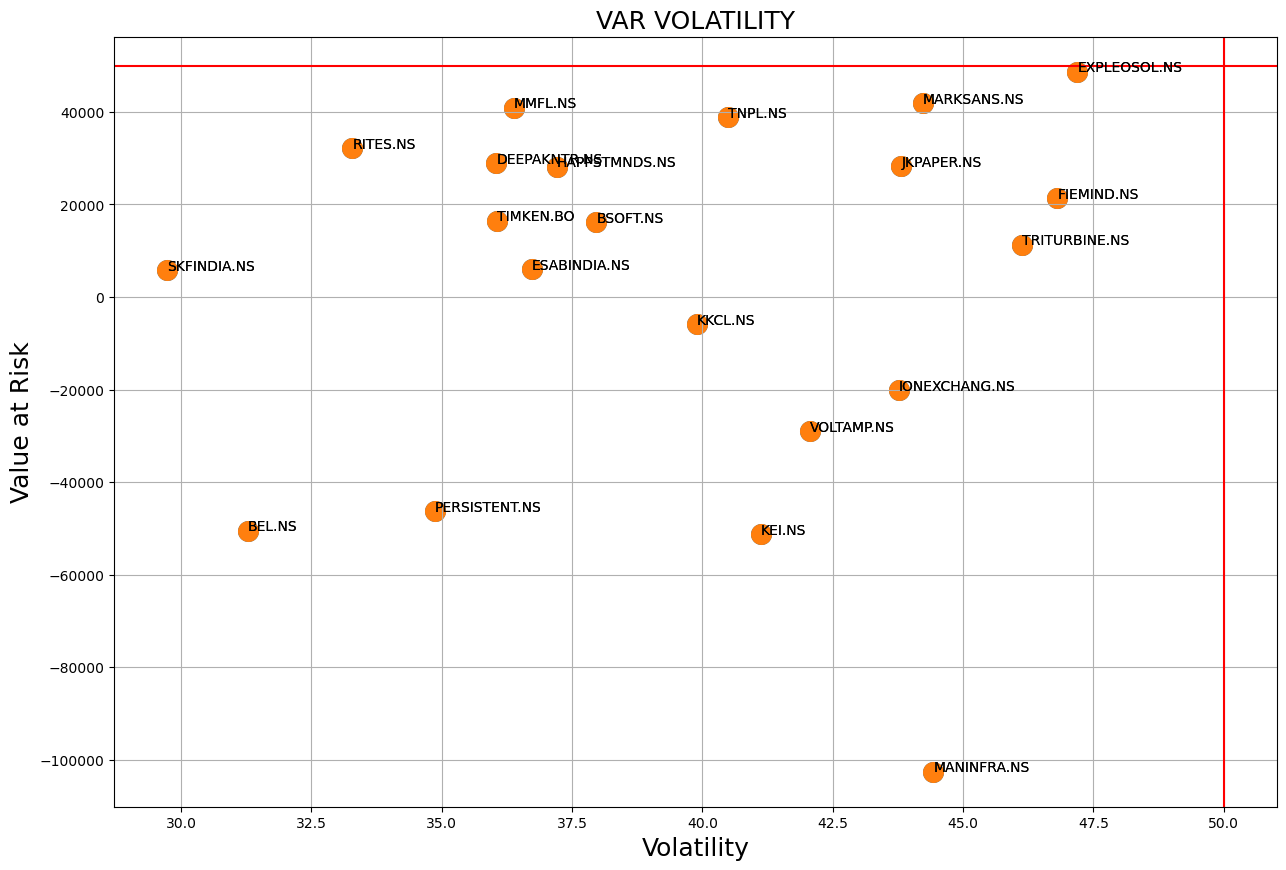

In [74]:
plt.figure(figsize=[15,10])
x= df3['Return%']
y = df3['Value at Risk']
annotations = df3["Ticker"]
plt.grid(True)
plt.title('VAR Return', fontsize=18, color='black')
plt.xlabel("Return",fontsize=18, color='black')
plt.ylabel("Value at Risk", fontsize=18, color='black') 
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50000, color='r', linestyle='-')
plt.show()

plt.figure(figsize=[15,10])
x= df3['Volatility%']
y = df3['Value at Risk']
annotations = df3["Ticker"]
plt.grid(True)
plt.title('VAR VOLATILITY', fontsize=18, color='black')
plt.xlabel("Volatility",fontsize=18, color='black')
plt.ylabel("Value at Risk", fontsize=18, color='black') 
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50000, color='r', linestyle='-')
plt.show()

In [75]:
len(df3)

21

In [76]:
df4 = df3.sort_values(by='Return%', ascending=False)

In [77]:
df4.head(40)

level_0  index         Ticker   Cov_mar  Market_var      Beta  \
0         2      3    MANINFRA.NS  0.026236    0.021896  1.198195   
1         3      4         KEI.NS  0.014068    0.021896  0.642502   
2         4     20     VOLTAMP.NS  0.015118    0.021896  0.690461   
3         5      8  IONEXCHANG.NS  0.013299    0.021896  0.607354   
4         6     11  PERSISTENT.NS  0.023313    0.021896  1.064691   
5         7     16  TRITURBINE.NS  0.018363    0.021896  0.838648   
6         8      1         BEL.NS  0.018502    0.021896  0.844977   
7         9     17        KKCL.NS  0.014472    0.021896  0.660950   
8        10     22     FIEMIND.NS  0.021288    0.021896  0.972213   
9        11     14     JKPAPER.NS  0.023515    0.021896  1.073931   
10       12     26   ESABINDIA.NS  0.012894    0.021896  0.588890   
11       13     30       BSOFT.NS  0.023805    0.021896  1.087178   
12       14     21      TIMKEN.BO  0.010921    0.021896  0.498752   
13       15      9    MARKSANS.NS  0.018063    0.021896  0.824940   
14       16     12   EXPLEOSOL.NS  0.016791    0.021896  0.766829   
15       17     10  HAPPSTMNDS.NS  0.016318    0.021896  0.745257   
16       18     19    SKFINDIA.NS  0.012707    0.021896  0.580336   
17       20     13        TNPL.NS  0.020547    0.021896  0.938381   
18       21      5   DEEPAKNTR.NS  0.023505    0.021896  1.073486   
19       22      2       RITES.NS  0.010801    0.021896  0.493272   
20       23     15        MMFL.NS  0.013327    0.021896  0.608639   

    Volatility%    Return%          CV  Sharp Ratio        CAGR     MAXDD%  \
0     44.428482  76.928683   57.752817     1.618977  115.598405  48.152470   
1     41.124721  62.655356   65.636401     1.401963   86.956703  21.472188   
2     42.059994  58.501502   71.895579     1.272028   79.359944  31.442913   
3     43.762311  57.981288   75.476611     1.210660   44.182394  23.809918   
4     34.870841  52.816731   66.022339     1.371253   69.461160  36.085400   
5     46.132912  51.420207   89.717475     1.006228   67.114197  31.684732   
6     31.286945  49.267153   63.504673     1.414876   63.559354  22.007849   
7     39.891371  48.470871   82.299679     1.089731   62.263877  33.172127   
8     46.805087  47.996681   97.517341     0.918633   61.497295  38.504080   
9     43.812470  40.271313  108.793250     0.805052   49.506387  31.294038   
10    36.723702  40.186747   91.382619     0.958148   49.380179  22.852517   
11    37.961862  38.051209   99.765193     0.870642   46.228149  56.391823   
12    36.065179  35.030957  102.952310     0.832686   40.194322  24.430418   
13    44.222657  34.179006  129.385439     0.659820   40.681486  58.276045   
14    47.191568  33.840841  139.451524     0.611144   41.140709  36.096971   
15    37.207470  31.301597  118.867642     0.706890   36.696503  49.800145   
16    29.731473  31.064648   95.708386     0.876669   36.373422  24.793149   
17    40.492744  30.465404  132.913857     0.628888   35.559754  33.446909   
18    36.045099  29.501798  122.179332     0.679754   34.261513  41.228339   
19    33.284308  24.182849  137.636006     0.576333   27.315962  26.229774   
20    36.385644  23.772967  153.054703     0.515944   26.795887  29.965533   

    Value at Risk  
0  -102587.481752  
1   -51247.344405  
2   -28967.309861  
3   -20124.359898  
4   -46290.722688  
5    11254.369212  
6   -50507.109733  
7    -5880.349216  
8    21306.491575  
9    28296.766652  
10    5934.020815  
11   16150.772130  
12   16472.988951  
13   41872.505151  
14   48667.265830  
15   28121.276509  
16    5801.514631  
17   38783.305682  
18   28873.275452  
19   32188.520036  
20   40873.856842

In [78]:
df4.tail(30)

level_0  index         Ticker   Cov_mar  Market_var      Beta  \
0         2      3    MANINFRA.NS  0.026236    0.021896  1.198195   
1         3      4         KEI.NS  0.014068    0.021896  0.642502   
2         4     20     VOLTAMP.NS  0.015118    0.021896  0.690461   
3         5      8  IONEXCHANG.NS  0.013299    0.021896  0.607354   
4         6     11  PERSISTENT.NS  0.023313    0.021896  1.064691   
5         7     16  TRITURBINE.NS  0.018363    0.021896  0.838648   
6         8      1         BEL.NS  0.018502    0.021896  0.844977   
7         9     17        KKCL.NS  0.014472    0.021896  0.660950   
8        10     22     FIEMIND.NS  0.021288    0.021896  0.972213   
9        11     14     JKPAPER.NS  0.023515    0.021896  1.073931   
10       12     26   ESABINDIA.NS  0.012894    0.021896  0.588890   
11       13     30       BSOFT.NS  0.023805    0.021896  1.087178   
12       14     21      TIMKEN.BO  0.010921    0.021896  0.498752   
13       15      9    MARKSANS.NS  0.018063    0.021896  0.824940   
14       16     12   EXPLEOSOL.NS  0.016791    0.021896  0.766829   
15       17     10  HAPPSTMNDS.NS  0.016318    0.021896  0.745257   
16       18     19    SKFINDIA.NS  0.012707    0.021896  0.580336   
17       20     13        TNPL.NS  0.020547    0.021896  0.938381   
18       21      5   DEEPAKNTR.NS  0.023505    0.021896  1.073486   
19       22      2       RITES.NS  0.010801    0.021896  0.493272   
20       23     15        MMFL.NS  0.013327    0.021896  0.608639   

    Volatility%    Return%          CV  Sharp Ratio        CAGR     MAXDD%  \
0     44.428482  76.928683   57.752817     1.618977  115.598405  48.152470   
1     41.124721  62.655356   65.636401     1.401963   86.956703  21.472188   
2     42.059994  58.501502   71.895579     1.272028   79.359944  31.442913   
3     43.762311  57.981288   75.476611     1.210660   44.182394  23.809918   
4     34.870841  52.816731   66.022339     1.371253   69.461160  36.085400   
5     46.132912  51.420207   89.717475     1.006228   67.114197  31.684732   
6     31.286945  49.267153   63.504673     1.414876   63.559354  22.007849   
7     39.891371  48.470871   82.299679     1.089731   62.263877  33.172127   
8     46.805087  47.996681   97.517341     0.918633   61.497295  38.504080   
9     43.812470  40.271313  108.793250     0.805052   49.506387  31.294038   
10    36.723702  40.186747   91.382619     0.958148   49.380179  22.852517   
11    37.961862  38.051209   99.765193     0.870642   46.228149  56.391823   
12    36.065179  35.030957  102.952310     0.832686   40.194322  24.430418   
13    44.222657  34.179006  129.385439     0.659820   40.681486  58.276045   
14    47.191568  33.840841  139.451524     0.611144   41.140709  36.096971   
15    37.207470  31.301597  118.867642     0.706890   36.696503  49.800145   
16    29.731473  31.064648   95.708386     0.876669   36.373422  24.793149   
17    40.492744  30.465404  132.913857     0.628888   35.559754  33.446909   
18    36.045099  29.501798  122.179332     0.679754   34.261513  41.228339   
19    33.284308  24.182849  137.636006     0.576333   27.315962  26.229774   
20    36.385644  23.772967  153.054703     0.515944   26.795887  29.965533   

    Value at Risk  
0  -102587.481752  
1   -51247.344405  
2   -28967.309861  
3   -20124.359898  
4   -46290.722688  
5    11254.369212  
6   -50507.109733  
7    -5880.349216  
8    21306.491575  
9    28296.766652  
10    5934.020815  
11   16150.772130  
12   16472.988951  
13   41872.505151  
14   48667.265830  
15   28121.276509  
16    5801.514631  
17   38783.305682  
18   28873.275452  
19   32188.520036  
20   40873.856842

In [79]:
df3.head(20)

level_0  index         Ticker   Cov_mar  Market_var      Beta  \
0         2      3    MANINFRA.NS  0.026236    0.021896  1.198195   
1         3      4         KEI.NS  0.014068    0.021896  0.642502   
2         4     20     VOLTAMP.NS  0.015118    0.021896  0.690461   
3         5      8  IONEXCHANG.NS  0.013299    0.021896  0.607354   
4         6     11  PERSISTENT.NS  0.023313    0.021896  1.064691   
5         7     16  TRITURBINE.NS  0.018363    0.021896  0.838648   
6         8      1         BEL.NS  0.018502    0.021896  0.844977   
7         9     17        KKCL.NS  0.014472    0.021896  0.660950   
8        10     22     FIEMIND.NS  0.021288    0.021896  0.972213   
9        11     14     JKPAPER.NS  0.023515    0.021896  1.073931   
10       12     26   ESABINDIA.NS  0.012894    0.021896  0.588890   
11       13     30       BSOFT.NS  0.023805    0.021896  1.087178   
12       14     21      TIMKEN.BO  0.010921    0.021896  0.498752   
13       15      9    MARKSANS.NS  0.018063    0.021896  0.824940   
14       16     12   EXPLEOSOL.NS  0.016791    0.021896  0.766829   
15       17     10  HAPPSTMNDS.NS  0.016318    0.021896  0.745257   
16       18     19    SKFINDIA.NS  0.012707    0.021896  0.580336   
17       20     13        TNPL.NS  0.020547    0.021896  0.938381   
18       21      5   DEEPAKNTR.NS  0.023505    0.021896  1.073486   
19       22      2       RITES.NS  0.010801    0.021896  0.493272   

    Volatility%    Return%          CV  Sharp Ratio        CAGR     MAXDD%  \
0     44.428482  76.928683   57.752817     1.618977  115.598405  48.152470   
1     41.124721  62.655356   65.636401     1.401963   86.956703  21.472188   
2     42.059994  58.501502   71.895579     1.272028   79.359944  31.442913   
3     43.762311  57.981288   75.476611     1.210660   44.182394  23.809918   
4     34.870841  52.816731   66.022339     1.371253   69.461160  36.085400   
5     46.132912  51.420207   89.717475     1.006228   67.114197  31.684732   
6     31.286945  49.267153   63.504673     1.414876   63.559354  22.007849   
7     39.891371  48.470871   82.299679     1.089731   62.263877  33.172127   
8     46.805087  47.996681   97.517341     0.918633   61.497295  38.504080   
9     43.812470  40.271313  108.793250     0.805052   49.506387  31.294038   
10    36.723702  40.186747   91.382619     0.958148   49.380179  22.852517   
11    37.961862  38.051209   99.765193     0.870642   46.228149  56.391823   
12    36.065179  35.030957  102.952310     0.832686   40.194322  24.430418   
13    44.222657  34.179006  129.385439     0.659820   40.681486  58.276045   
14    47.191568  33.840841  139.451524     0.611144   41.140709  36.096971   
15    37.207470  31.301597  118.867642     0.706890   36.696503  49.800145   
16    29.731473  31.064648   95.708386     0.876669   36.373422  24.793149   
17    40.492744  30.465404  132.913857     0.628888   35.559754  33.446909   
18    36.045099  29.501798  122.179332     0.679754   34.261513  41.228339   
19    33.284308  24.182849  137.636006     0.576333   27.315962  26.229774   

    Value at Risk  
0  -102587.481752  
1   -51247.344405  
2   -28967.309861  
3   -20124.359898  
4   -46290.722688  
5    11254.369212  
6   -50507.109733  
7    -5880.349216  
8    21306.491575  
9    28296.766652  
10    5934.020815  
11   16150.772130  
12   16472.988951  
13   41872.505151  
14   48667.265830  
15   28121.276509  
16    5801.514631  
17   38783.305682  
18   28873.275452  
19   32188.520036

In [80]:
df2.head(30)

index         Ticker   Cov_mar  Market_var      Beta  Volatility%  \
0      18     AVANTEL.BO  0.018477    0.021896  0.843826    53.760899   
1       6    PITTIENG.NS  0.018121    0.021896  0.827579    50.195453   
2       3    MANINFRA.NS  0.026236    0.021896  1.198195    44.428482   
3       4         KEI.NS  0.014068    0.021896  0.642502    41.124721   
4      20     VOLTAMP.NS  0.015118    0.021896  0.690461    42.059994   
5       8  IONEXCHANG.NS  0.013299    0.021896  0.607354    43.762311   
6      11  PERSISTENT.NS  0.023313    0.021896  1.064691    34.870841   
7      16  TRITURBINE.NS  0.018363    0.021896  0.838648    46.132912   
8       1         BEL.NS  0.018502    0.021896  0.844977    31.286945   
9      17        KKCL.NS  0.014472    0.021896  0.660950    39.891371   
10     22     FIEMIND.NS  0.021288    0.021896  0.972213    46.805087   
11     14     JKPAPER.NS  0.023515    0.021896  1.073931    43.812470   
12     26   ESABINDIA.NS  0.012894    0.021896  0.588890    36.723702   
13     30       BSOFT.NS  0.023805    0.021896  1.087178    37.961862   
14     21      TIMKEN.BO  0.010921    0.021896  0.498752    36.065179   
15      9    MARKSANS.NS  0.018063    0.021896  0.824940    44.222657   
16     12   EXPLEOSOL.NS  0.016791    0.021896  0.766829    47.191568   
17     10  HAPPSTMNDS.NS  0.016318    0.021896  0.745257    37.207470   
18     19    SKFINDIA.NS  0.012707    0.021896  0.580336    29.731473   
19      0   VIMTALABS.NS  0.012388    0.021896  0.565739    49.718424   
20     13        TNPL.NS  0.020547    0.021896  0.938381    40.492744   
21      5   DEEPAKNTR.NS  0.023505    0.021896  1.073486    36.045099   
22      2       RITES.NS  0.010801    0.021896  0.493272    33.284308   
23     15        MMFL.NS  0.013327    0.021896  0.608639    36.385644   
24     24    ADFFOODS.NS  0.019714    0.021896  0.900335    41.734702   
25     29       CIPLA.NS  0.005265    0.021896  0.240458    23.195250   
26     23   GUJGASLTD.NS  0.014560    0.021896  0.664956    32.785634   
27      7  VINATIORGA.NS  0.009543    0.021896  0.435823    27.791283   

      Return%          CV  Sharp Ratio        CAGR     MAXDD%  Value at Risk  
0   99.695904   53.924882     1.761427  170.637961  31.118336 -162717.526825  
1   84.650467   59.297314     1.586806  132.881778  31.922989  -97319.311783  
2   76.928683   57.752817     1.618977  115.598405  48.152470 -102587.481752  
3   62.655356   65.636401     1.401963   86.956703  21.472188  -51247.344405  
4   58.501502   71.895579     1.272028   79.359944  31.442913  -28967.309861  
5   57.981288   75.476611     1.210660   44.182394  23.809918  -20124.359898  
6   52.816731   66.022339     1.371253   69.461160  36.085400  -46290.722688  
7   51.420207   89.717475     1.006228   67.114197  31.684732   11254.369212  
8   49.267153   63.504673     1.414876   63.559354  22.007849  -50507.109733  
9   48.470871   82.299679     1.089731   62.263877  33.172127   -5880.349216  
10  47.996681   97.517341     0.918633   61.497295  38.504080   21306.491575  
11  40.271313  108.793250     0.805052   49.506387  31.294038   28296.766652  
12  40.186747   91.382619     0.958148   49.380179  22.852517    5934.020815  
13  38.051209   99.765193     0.870642   46.228149  56.391823   16150.772130  
14  35.030957  102.952310     0.832686   40.194322  24.430418   16472.988951  
15  34.179006  129.385439     0.659820   40.681486  58.276045   41872.505151  
16  33.840841  139.451524     0.611144   41.140709  36.096971   48667.265830  
17  31.301597  118.867642     0.706890   36.696503  49.800145   28121.276509  
18  31.064648   95.708386     0.876669   36.373422  24.793149    5801.514631  
19  30.739944  161.738825     0.517714   37.035869  39.961254   57857.689861  
20  30.465404  132.913857     0.628888   35.559754  33.446909   38783.305682  
21  29.501798  122.179332     0.679754   34.261513  41.228339   28873.275452  
22  24.182849  137.636006     0.576333   27.315962  26.229774   32188

In [83]:
dfcv = df1.sort_values(by='CV', ascending=True)

In [84]:
dfcv

Ticker   Cov_mar  Market_var      Beta  Volatility%    Return%  \
18     AVANTEL.BO  0.018477    0.021896  0.843826    53.760899  99.695904   
3     MANINFRA.NS  0.026236    0.021896  1.198195    44.428482  76.928683   
6     PITTIENG.NS  0.018121    0.021896  0.827579    50.195453  84.650467   
1          BEL.NS  0.018502    0.021896  0.844977    31.286945  49.267153   
4          KEI.NS  0.014068    0.021896  0.642502    41.124721  62.655356   
11  PERSISTENT.NS  0.023313    0.021896  1.064691    34.870841  52.816731   
20     VOLTAMP.NS  0.015118    0.021896  0.690461    42.059994  58.501502   
8   IONEXCHANG.NS  0.013299    0.021896  0.607354    43.762311  57.981288   
17        KKCL.NS  0.014472    0.021896  0.660950    39.891371  48.470871   
16  TRITURBINE.NS  0.018363    0.021896  0.838648    46.132912  51.420207   
26   ESABINDIA.NS  0.012894    0.021896  0.588890    36.723702  40.186747   
19    SKFINDIA.NS  0.012707    0.021896  0.580336    29.731473  31.064648   
22     FIEMIND.NS  0.021288    0.021896  0.972213    46.805087  47.996681   
30       BSOFT.NS  0.023805    0.021896  1.087178    37.961862  38.051209   
21      TIMKEN.BO  0.010921    0.021896  0.498752    36.065179  35.030957   
14     JKPAPER.NS  0.023515    0.021896  1.073931    43.812470  40.271313   
10  HAPPSTMNDS.NS  0.016318    0.021896  0.745257    37.207470  31.301597   
5    DEEPAKNTR.NS  0.023505    0.021896  1.073486    36.045099  29.501798   
9     MARKSANS.NS  0.018063    0.021896  0.824940    44.222657  34.179006   
13        TNPL.NS  0.020547    0.021896  0.938381    40.492744  30.465404   
2        RITES.NS  0.010801    0.021896  0.493272    33.284308  24.182849   
12   EXPLEOSOL.NS  0.016791    0.021896  0.766829    47.191568  33.840841   
29       CIPLA.NS  0.005265    0.021896  0.240458    23.195250  15.903544   
15        MMFL.NS  0.013327    0.021896  0.608639    36.385644  23.772967   
0    VIMTALABS.NS  0.012388    0.021896  0.565739    49.718424  30.739944   
24    ADFFOODS.NS  0.019714    0.021896  0.900335    41.734702  16.894205   
7   VINATIORGA.NS  0.009543    0.021896  0.435823    27.791283  10.584890   
23   GUJGASLTD.NS  0.014560    0.021896  0.664956    32.785634  12.485290   

            CV  Sharp Ratio        CAGR     MAXDD%  Value at Risk  
18   53.924882     1.761427  170.637961  31.118336 -162717.526825  
3    57.752817     1.618977  115.598405  48.152470 -102587.481752  
6    59.297314     1.586806  132.881778  31.922989  -97319.311783  
1    63.504673     1.414876   63.559354  22.007849  -50507.109733  
4    65.636401     1.401963   86.956703  21.472188  -51247.344405  
11   66.022339     1.371253   69.461160  36.085400  -46290.722688  
20   71.895579     1.272028   79.359944  31.442913  -28967.309861  
8    75.476611     1.210660   44.182394  23.809918  -20124.359898  
17   82.299679     1.089731   62.263877  33.172127   -5880.349216  
16   89.717475     1.006228   67.114197  31.684732   11254.369212  
26   91.382619     0.958148   49.380179  22.852517    5934.020815  
19   95.708386     0.876669   36.373422  24.793149    5801.514631  
22   97.517341     0.918633   61.497295  38.504080   21306.491575  
30   99.765193     0.870642   46.228149  56.391823   16150.772130  
21  102.952310     0.832686   40.194322  24.430418   16472.988951  
14  108.793250     0.805052   49.506387  31.294038   28296.766652  
10  118.867642     0.706890   36.696503  49.800145   28121.276509  
5   122.179332     0.679754   34.261513  41.228339   28873.275452  
9   129.385439     0.659820   40.681486  58.276045   41872.505151  
13  132.913857     0.628888   35.559754  33.446909   38783.305682  
2   137.636006     0.576333   27.315962  26.229774   32188.520036  
12  139.451524     0.611144   41.140709  36.096971   48667.265830  
29  145.849568     0.470077   17.212756  26.508441   23396.494072  
15  153.054703     0.515944   26.795887  29.965533   40873.856842  
0   161.738825     0.517714   37.035869  39.961254   57857.689861  
24  247.0

In [85]:
dfcv.to_csv("//Users//sjacob//Downloads//NEWSTOCK.csv")